# Pre-Processing | US Inflation

# Table of Contents<a id='#home'></a>
* [3.0 Pre-Processing](#pre_p)
  * [3.1 Contents](#contents)
  * [3.2 Import Libs](#libs)
  * [3.3 Reassessing the input](#inputs)
  * [3.4 Creating Dummy Variables](#dummies)
  * [3.5 Split data](#split)
  * [3.6 Scale Data](#scale)
    * [3.6.1 Standardization ( X & y scaled )](#ss)
    * [3.6.2 MinMaxScaler ( X & y scaled )](#mm)
    * [3.6.3 Log Transform ( X & y scaled )](#log)
    * [3.6.4 Standardization ( X scaled only )](#ss_x)
    * [3.6.5 MinMaxScaler ( X scaled only )](#mm_x)
    * [3.6.6 Log Transform ( X scaled only )](#log_x)
  * [3.7 Scaling Review](#scale_rev)
  * [3.8 Balancing SS & LG to unscaled y](#ss_log)
    * [3.8.1 LG to unscaled y](#lg_uns)
    * [3.8.2 SS to unscaled y](#ss_uns)
    * [3.8.3 SS & LG together & metrics](#together)
  * [3.9 Conclusion](#conclusion)



## 3.1 Contents<a id='contents'></a>

The enclosed represents Chapter 16.3 of the Springboard Data Scientist Career Track. The structure is as follows:
   * Creating Dummy Variables
   * Splitting the Data into Training & Testing subsets for Machine Learning
   * Standardized Scaling

I hope this submission shows that I understand when to apply the proper steps.

This code is built in Jupyter Notebook & uploaded on Github.


## 3.2 Import Libs<a id='libs'></a>

**Importing the relevant libraries to start**

In [1]:
#Import the necessary tools required in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np


# 3.3 Reassessing the input

We will import the dataframe from the previous Exploratory Data Analysis ( EDA ) section.

In [11]:
cd

C:\Users\rands


In [22]:
df = pd.read_csv('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_main_roll.csv')

As a reminder, the dataframe is composed of a quarterly change ( back ) on both `Inflation` & the Variables. The variables, however, are taking a rolling average. The rational is based on the idea that one of the variables may have had a bad day / week at the end of their respective term. If so, they may not properly display the impact they may have had on `Inflation`.

`Inflation` on the other hand, was moderately scraped in one Z-score round.

As a reminder, the dataframe is composed of a quarterly change ( back ) on both `Inflation` & the Variables. The variables, however, are taking a rolling average. The rational is based on the idea that one of the variables may have had a bad day / week at the end of their respective term. If so, they may not properly display the impact they may have had on `Inflation`.

`Inflation` on the other hand, was moderately scraped in one Z-score round.

In [23]:
df.head()

,Date,Inflation,Wage CPI,WTI,Heating Oil,Copper,Sugar,Natural Gas,Cattle,Lean Hogs,...,Lumber,Capacity Utilization,Corn,M2 Velocity,GDP,Wheat,PMI,USD Index,Unemployment Rate,Initial Jobless Claims
0,2021-03-31 00:00:00,1.258,0.010480,0.369991,0.369560,0.175348,0.120553,-0.007061,0.070928,0.186173,...,0.489504,0.005820,0.296406,-0.010573,0.025781,0.066452,2.400000,-0.025315,-0.600000,18500.000000
1,2021-02-28 00:00:00,0.501,0.007630,0.294725,0.362725,0.178939,0.153711,0.039364,0.056126,0.071797,...,0.364326,0.017240,0.267969,-0.010573,0.025781,0.081492,2.600000,-0.028476,-0.733333,41500.000000
2,2021-01-31 00:00:00,0.218,0.006251,0.133619,0.212935,0.143127,0.167539,0.133913,0.052881,0.083947,...,0.119677,0.026240,0.244380,-0.010573,0.025781,0.075828,2.266667,-0.021939,-1.133333,-6333.333333
3,2020-12-31 00:00:00,-0.009,0.006591,0.045217,0.075287,0.102038,0.183723,0.331085,0.055001,0.251831,...,0.017824,0.023439,0.227807,-0.011324,0.015327,0.121747,4.000000,-0.020209,-2.033333,-170166.666700
4,2020-11-30 00:00:00,-0.135,0.009198,0.012381,-0.024694,0.097439,0.145086,0.400814,0.076208,0.340989,...,0.352576,0.030591,0.194635,-0.011324,0.015327,0.137836,3.566667,-0.022875,-2.766667,-374750.000000


Per below, they have been scraped ( i.e. no null values ) & they all came in from the the API as floats ( which we want ). The `Date` is the only non-float variable.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    313 non-null    object 
 1   Inflation               313 non-null    float64
 2   Wage CPI                313 non-null    float64
 3   WTI                     313 non-null    float64
 4   Heating Oil             313 non-null    float64
 5   Copper                  313 non-null    float64
 6   Sugar                   313 non-null    float64
 7   Natural Gas             313 non-null    float64
 8   Cattle                  313 non-null    float64
 9   Lean Hogs               313 non-null    float64
 10  Soybeans                313 non-null    float64
 11  Lumber                  313 non-null    float64
 12  Capacity Utilization    313 non-null    float64
 13  Corn                    313 non-null    float64
 14  M2 Velocity             313 non-null    fl

In [25]:
df.shape

(313, 21)

In [26]:
df.describe()

,Inflation,Wage CPI,WTI,Heating Oil,Copper,Sugar,Natural Gas,Cattle,Lean Hogs,Soybeans,Lumber,Capacity Utilization,Corn,M2 Velocity,GDP,Wheat,PMI,USD Index,Unemployment Rate,Initial Jobless Claims
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,3.130000e+02
mean,-0.022601,0.005542,0.021766,0.020997,0.019914,0.020275,0.035076,0.006913,0.018321,0.012311,0.029315,-0.000391,0.015080,-0.004434,0.010788,0.016812,0.067412,0.000866,0.005005,3.680245e+03
std,0.829942,0.005810,0.151866,0.139062,0.119602,0.147229,0.197313,0.066706,0.140979,0.098266,0.160300,0.017842,0.123465,0.022430,0.014099,0.109730,2.949277,0.034238,0.879689,2.698547e+05
min,-4.846000,-0.034864,-0.528002,-0.456848,-0.490200,-0.362170,-0.378821,-0.209991,-0.322853,-0.327256,-0.318534,-0.128528,-0.340215,-0.200145,-0.094662,-0.299369,-11.833333,-0.072180,-4.266667,-2.113167e+06
25%,-0.378000,0.003994,-0.056422,-0.050301,-0.049350,-0.080178,-0.088856,-0.039394,-0.075325,-0.041699,-0.074034,-0.004275,-0.058520,-0.007473,0.008557,-0.055866,-1.700000,-0.024159,-0.200000,-1.000000e+04
50%,-0.014000,0.006439,0.025317,0.021081,0.010359,-0.009599,0.006883,0.011879,0.006797,0.007084,0.017241,0.001780,0.004387,-0.003163,0.011641,0.007015,-0.100000,0.000687,-0.066667,-2.500000e+03
75%,0.358000,0.008240,0.117495,0.104692,0.088056,0.100828,0.157453,0.056126,0.113641,0.061045,0.117489,0.006229,0.076234,0.003914,0.015192,0.078272,1.700000,0.021898,0.066667,5.500000e+03
max,4.007000,0.023370,0.586463,0.369560,0.496467,0.604139,0.629854,0.181570,0.376706,0.288663,0.931183,0.096035,0.475869,0.040798,0.084535,0.443412,10.666667,0.118429,9.266667,3.001750e+06


## 3.4 Creating Dummy Variables<a id='dummies'></a>

In [27]:
df_dummies = pd.get_dummies( df, columns=['Inflation'], prefix='D' )

In [28]:
df_dummies.head(2)

,Date,Wage CPI,WTI,Heating Oil,Copper,Sugar,Natural Gas,Cattle,Lean Hogs,Soybeans,...,D_1.4609999999999999,D_1.5290000000000001,D_1.5319999999999998,D_1.663,D_1.9140000000000001,D_2.157,D_2.336,D_2.8089999999999997,D_3.322,D_4.007
0,2021-03-31 00:00:00,0.01048,0.369991,0.369560,0.175348,0.120553,-0.007061,0.070928,0.186173,0.208343,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-28 00:00:00,0.00763,0.294725,0.362725,0.178939,0.153711,0.039364,0.056126,0.071797,0.235484,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.head()

,Date,Inflation,Wage CPI,WTI,Heating Oil,Copper,Sugar,Natural Gas,Cattle,Lean Hogs,...,Lumber,Capacity Utilization,Corn,M2 Velocity,GDP,Wheat,PMI,USD Index,Unemployment Rate,Initial Jobless Claims
0,2021-03-31 00:00:00,1.258,0.010480,0.369991,0.369560,0.175348,0.120553,-0.007061,0.070928,0.186173,...,0.489504,0.005820,0.296406,-0.010573,0.025781,0.066452,2.400000,-0.025315,-0.600000,18500.000000
1,2021-02-28 00:00:00,0.501,0.007630,0.294725,0.362725,0.178939,0.153711,0.039364,0.056126,0.071797,...,0.364326,0.017240,0.267969,-0.010573,0.025781,0.081492,2.600000,-0.028476,-0.733333,41500.000000
2,2021-01-31 00:00:00,0.218,0.006251,0.133619,0.212935,0.143127,0.167539,0.133913,0.052881,0.083947,...,0.119677,0.026240,0.244380,-0.010573,0.025781,0.075828,2.266667,-0.021939,-1.133333,-6333.333333
3,2020-12-31 00:00:00,-0.009,0.006591,0.045217,0.075287,0.102038,0.183723,0.331085,0.055001,0.251831,...,0.017824,0.023439,0.227807,-0.011324,0.015327,0.121747,4.000000,-0.020209,-2.033333,-170166.666700
4,2020-11-30 00:00:00,-0.135,0.009198,0.012381,-0.024694,0.097439,0.145086,0.400814,0.076208,0.340989,...,0.352576,0.030591,0.194635,-0.011324,0.015327,0.137836,3.566667,-0.022875,-2.766667,-374750.000000


While we knew going into the process that the entire data set is composed of "non categorical" data, notably floats, we undertook dummy variable creation process to double confirm.

**We will proceed forward without the dummy variables.**

## 3.5 Split data<a id='split'></a>

We will now undertake the train / test split. Please note, there are three ( 3 ) scaling approaches ( next section ). Therefore, we will do one ( 1 ) main split but assign the `Train` & `Test` splits to each of the scaling approaches individually; in other words, each one will have its own data frame.

Listed below is a summary of the scaling names, the approach & the name of the respective data frames which we will formalize in the next section. Each will have a train test split formalized here:

   * **Standardization**
      * This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves
      * Data Frame Name  |  `_SS`   
   * **MinMaxScaler** ( often called Normalization )
      * This approach reassigns the values from 0 -> 1
      * Data Frame Name  |  `_MM`
   * **Log Transformation**
      * This approach usually is used with data that has long tails
      * Data Frame Name  |  `_LG`

The creation of these train / test splits will start here but before we proceed we will need to import the necessary libraries.

In [30]:
# from library.sb_utils import save_file
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


**Train test split**

To begin, let's see what a `70% / 30% Train/Test Split` looks like.

In [31]:
print(' Train |', round(len(df)* 0.7,2), '\n','Test  |', len(df) * 0.3)

 Train | 219.1 
 Test  | 93.89999999999999


Now we have a reference to what the output should look like above. We will now split the data removing `Inflation` as that's the dependant variable.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Inflation'),
                                                    df.Inflation, test_size=0.3,
                                                    random_state=42
                                                   )

In [33]:
X_train.shape, X_test.shape

((219, 20), (94, 20))

In [34]:
y_train.shape, y_test.shape

((219,), (94,))

The above align with the previous review so we will proceed. We will need to remove `Date` as that's not something we will use in our model.

In [35]:
date_list = ['Date']
date_train = X_train[['Date']]
date_test = X_train[['Date']]

X_train.drop(columns=date_list, inplace=True)
X_test.drop(columns=date_list, inplace=True)
X_train.shape, X_test.shape

((219, 19), (94, 19))

In [36]:
reg_all = LinearRegression()

In [37]:
reg_all.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = reg_all.predict(X_test)

In [39]:
r_squared = reg_all.score(X_test, y_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {}".format(mae))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.37720041066570453
Mean Absolute Error: 0.4459291435305035
Root Mean Squared Error: 0.5980196870764755


The scores are less than promising. We hope these improve as the data frame is scaled.

As previously mentioned, we are assigning the `Train` & `Test` splits to each of the three ( 3 ) scaling approaches below.

## 3.6 Scale Data<a id='scale'></a>

Now that the train / test splits have been completed, we will implement three ( 3 ) scaling approaches listed below. The basic summary of each approach is listed below & their underscore of the data frame names from the end of the previous section as well:

   * **Standardization ( `_SS` )**
      * <i>This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves</i>
   * **MinMaxScaler ( `_MM` )** ( often called Normalization )
      * <i>This approach reassigns the values from 0 -> 1</i>
   * **Log Transformation ( `_Log` )**
      * <i>This approach usually is used with data that has long tails</i>

These will be scaled on both the `X` & `y` variables with the `_` listed above. Further to this, we will also scale the variables ( `X` ) & assess them to an unscaled `y`. Their underscores are listed below:

   * **Standardization ( `_SS_y_uns` )**
   * **MinMaxScaler ( `_MM_y_uns` )** 
   * **Log Transformation ( `_Log_y_uns` )**

To simplify the final comparisons, **there will be six ( 6 ) outcomes in total.**

The following three ( 3 ) will be **used for scaling on both `X` & `y`.**

**Standardization ( X & y )** | *Assignment to its respective data frames.*

In [40]:
X_train_SS = pd.DataFrame(X_train.copy())
X_test_SS = pd.DataFrame(X_test.copy())
y_train_SS = pd.DataFrame(y_train.copy())
y_test_SS = pd.DataFrame(y_test.copy())
y_tr_pred_SS = pd.DataFrame(y_pred.copy())

**MinMaxScaler ( X & y )** | *Assignment to its respective data frames.*

In [41]:
X_train_MM = pd.DataFrame(X_train.copy())
X_test_MM = pd.DataFrame(X_test.copy())
y_train_MM = pd.DataFrame(y_train.copy())
y_test_MM = pd.DataFrame(y_test.copy())
y_tr_pred_MM = pd.DataFrame(y_pred.copy())

**Log Transformation ( X & y )** | *Assignment to its respective data frames.*

In [42]:
X_train_LG = pd.DataFrame(X_train.copy())
X_test_LG = pd.DataFrame(X_test.copy())
y_train_LG = pd.DataFrame(y_train.copy())
y_test_LG = pd.DataFrame(y_test.copy())
y_tr_pred_LG = pd.DataFrame(y_pred.copy())

The following three ( 3 ) will be **used for scaling on `X` only.**

**Standardization ( X only )** | *Assignment to its respective data frames.*

In [43]:
X_train_SS_y_uns = pd.DataFrame(X_train.copy())
X_test_SS_y_uns = pd.DataFrame(X_test.copy())
y_train_SS_y_uns = pd.DataFrame(y_train.copy())
y_test_SS_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_SS_y_uns = pd.DataFrame(y_pred.copy())

**MinMaxScaler ( X only )** | *Assignment to its respective data frames.*

In [44]:
X_train_MM_y_uns = pd.DataFrame(X_train.copy())
X_test_MM_y_uns = pd.DataFrame(X_test.copy())
y_train_MM_y_uns = pd.DataFrame(y_train.copy())
y_test_MM_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_MM_y_uns = pd.DataFrame(y_pred.copy())

**Log Transformation ( X only )** | *Assignment to its respective data frames.*

In [45]:
X_train_LG_y_uns = pd.DataFrame(X_train.copy())
X_test_LG_y_uns = pd.DataFrame(X_test.copy())
y_train_LG_y_uns = pd.DataFrame(y_train.copy())
y_test_LG_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_LG_y_uns = pd.DataFrame(y_pred.copy())

Before we proceed we will need to import the necessary libraries for all.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

Further to this, we are setting up a list of the unscaled variables as they will need to be removed from each as we go; I trust this will make greater sense as we proceed. 

In [48]:
prev_cols = ['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']

## 3.6.1 Standardization ( X & y scaled )<a id='ss'></a>

The scalings approach & it's estimated results we will use in this section are as follows:
   * **Standardization ( `_SS` )**
      * This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves


In [49]:
SS_scaler = StandardScaler()

First `X_train_SS`

In [55]:
SS_scaler.fit(X_train_SS[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

StandardScaler()

In [56]:
X_train_SS[['Wages CPI_SS', 'WTI_SS', 'Heating Oil_SS','Copper_SS','Sugar_SS',
            'Natural Gas_SS','Cattle_SS','Lean Hogs_SS','Soybeans_SS','Lumber_SS',
            'Capacity Utilization_SS','Corn_SS','M2 Velocity_SS','GDP_SS','Wheat_SS','PMI_SS',
            'USD Index_SS','Unemployment Rate_SS','Initial Jobless Claims_SS']] = SS_scaler.transform(X_train_SS[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [57]:
X_train_SS.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wages CPI_SS', 'WTI_SS',
       'Heating Oil_SS', 'Copper_SS', 'Sugar_SS', 'Natural Gas_SS',
       'Cattle_SS', 'Lean Hogs_SS', 'Soybeans_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'Corn_SS', 'M2 Velocity_SS', 'GDP_SS',
       'Wheat_SS', 'PMI_SS', 'USD Index_SS', 'Unemployment Rate_SS',
       'Initial Jobless Claims_SS'],
      dtype='object')

In [58]:
X_train_SS.drop(columns=prev_cols, inplace=True)

In [59]:
X_train_SS.describe()

,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,3.574006e-17,5.677853e-17,-5.868752e-17,1.001229e-16,-3.802134e-17,-5.576463e-17,-6.843841e-18,-2.788231e-17,1.292725e-17,1.013902e-18,-3.295182e-18,4.106304e-17,-4.095215e-18,-6.311542e-17,-8.364694e-18,1.191335e-17,-3.041707e-18,-3.041707e-18,2.572777e-17
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-6.062318e+00,-3.554258e+00,-3.307158e+00,-4.275317e+00,-2.534857e+00,-2.092879e+00,-3.251186e+00,-2.412667e+00,-3.552930e+00,-2.447766e+00,-7.795038e+00,-3.095494e+00,-9.068365e+00,-8.151908e+00,-2.909327e+00,-4.035795e+00,-2.092087e+00,-3.918715e+00,-3.862139e+00
25%,-2.622508e-01,-5.738987e-01,-5.106932e-01,-5.903736e-01,-6.694239e-01,-6.272489e-01,-6.393442e-01,-5.898264e-01,-5.147225e-01,-6.792113e-01,-2.299928e-01,-5.887966e-01,-1.372215e-01,-1.434068e-01,-6.295338e-01,-5.733419e-01,-7.686037e-01,-2.860298e-01,-1.127636e-01
50%,1.137130e-01,3.652246e-02,-3.546556e-03,-1.277241e-01,-1.992945e-01,-1.776078e-01,6.243175e-02,-5.066135e-02,-3.896558e-02,-2.097464e-02,1.645101e-01,-1.044398e-01,4.201600e-02,8.882293e-02,-7.649249e-02,-6.581613e-02,5.368868e-02,-1.463112e-01,-8.392462e-02
75%,4.862085e-01,6.407473e-01,6.302291e-01,5.419286e-01,5.710310e-01,5.252051e-01,7.571885e-01,7.410920e-01,4.885812e-01,5.957653e-01,4.722769e-01,5.366638e-01,3.889674e-01,3.109964e-01,5.600397e-01,5.883282e-01,5.819297e-01,8.655327e-02,-4.724902e-02
max,3.088234e+00,2.605196e+00,2.396819e+00,3.899899e+00,3.949918e+00,2.963685e+00,2.354074e+00,2.559684e+00,2.721410e+00,4.104874e+00,2.018575e+00,2.995122e+00,2.102794e+00,5.751485e+00,3.904325e+00,3.577091e+00,3.428937e+00,1.014630e+01,1.121655e+01


The **Mean** & **Standard Deviation** look close enough to 0 & 1 respectively; thus, it was scaled correctly. We will now scale the others.

In [60]:
df_X_train_SS = pd.DataFrame(data = X_train_SS, columns = ['Wages CPI_SS', 'WTI_SS', 'Heating Oil_SS','Copper_SS','Sugar_SS',
            'Natural Gas_SS','Cattle_SS','Lean Hogs_SS','Soybeans_SS','Lumber_SS',
            'Capacity Utilization_SS','Corn_SS','M2 Velocity_SS','GDP_SS','Wheat_SS','PMI_SS',
            'USD Index_SS','Unemployment Rate_SS','Initial Jobless Claims_SS'])

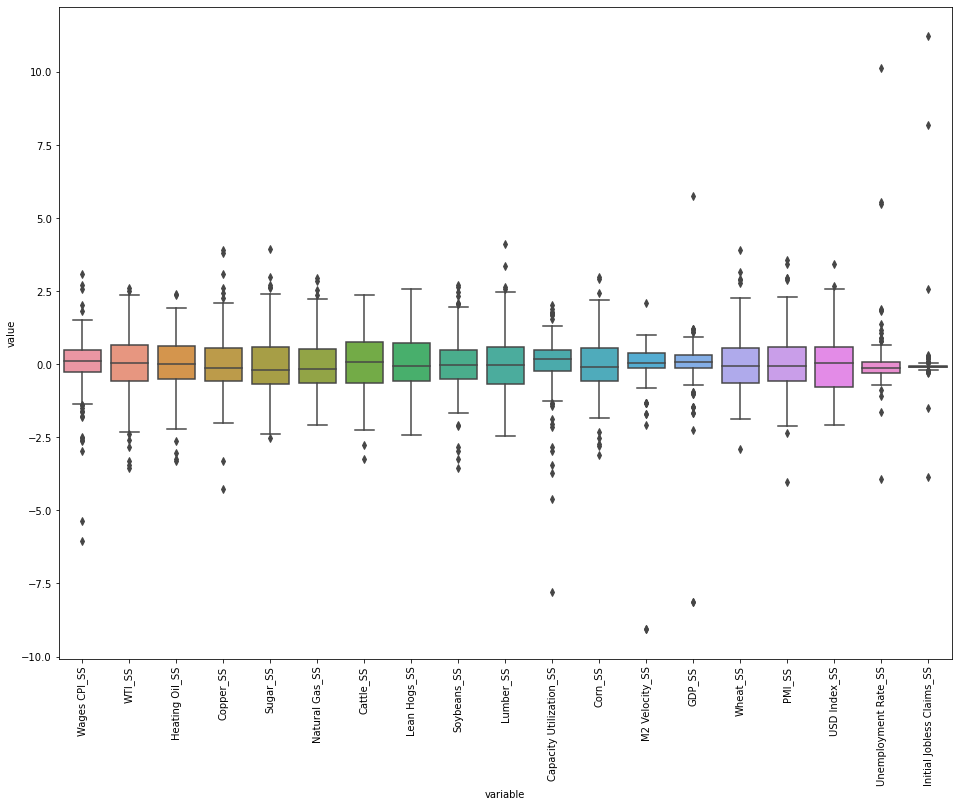

In [61]:
plt.figure(figsize=(16, 12))
chart = sns.boxplot(x='variable', y='value', data=pd.melt(df_X_train_SS))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

`X_test_SS` will not be scaled.

In [62]:
X_test_SS[['Wages CPI_SS', 'WTI_SS', 'Heating Oil_SS','Copper_SS','Sugar_SS',
            'Natural Gas_SS','Cattle_SS','Lean Hogs_SS','Soybeans_SS','Lumber_SS',
            'Capacity Utilization_SS','Corn_SS','M2 Velocity_SS','GDP_SS','Wheat_SS','PMI_SS',
            'USD Index_SS','Unemployment Rate_SS','Initial Jobless Claims_SS']] = SS_scaler.transform(X_test_SS[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [63]:
X_test_SS.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wages CPI_SS', 'WTI_SS',
       'Heating Oil_SS', 'Copper_SS', 'Sugar_SS', 'Natural Gas_SS',
       'Cattle_SS', 'Lean Hogs_SS', 'Soybeans_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'Corn_SS', 'M2 Velocity_SS', 'GDP_SS',
       'Wheat_SS', 'PMI_SS', 'USD Index_SS', 'Unemployment Rate_SS',
       'Initial Jobless Claims_SS'],
      dtype='object')

In [64]:
X_test_SS.drop(columns=prev_cols, inplace=True)

In [65]:
X_test_SS.describe()

,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.039725,0.007935,-0.029998,-0.162066,0.105502,-0.059875,-0.039083,0.041086,0.005910,0.175033,0.125599,-0.002570,0.018809,0.098847,-0.019342,-0.030541,0.078927,-0.153743,-0.203085
std,1.033855,0.965297,0.857436,0.959798,0.955151,0.961777,0.986806,1.006278,1.093236,1.441363,1.414106,1.234954,1.128372,1.285664,1.025338,0.992570,0.969684,1.642094,1.035767
min,-7.038150,-3.580742,-3.212043,-4.187623,-1.418830,-2.025262,-2.905044,-1.651817,-2.783626,-2.289388,-8.154967,-2.789248,-9.068365,-8.151908,-2.047304,-3.235033,-2.042697,-6.014495,-8.023722
25%,-0.406660,-0.464830,-0.488930,-0.739344,-0.521482,-0.755813,-0.743428,-0.705898,-0.659477,-0.777960,-0.174471,-0.705320,-0.134090,-0.082749,-0.753886,-0.663569,-0.584194,-0.332603,-0.111902
50%,0.156537,0.020075,-0.062487,-0.157241,-0.085375,-0.154073,0.058996,-0.098348,-0.147656,-0.057829,0.203446,-0.057043,0.118361,0.112455,-0.114992,-0.043259,-0.001132,-0.192884,-0.088470
75%,0.430470,0.561096,0.439143,0.322455,0.591862,0.618387,0.702137,0.682856,0.767235,0.829421,0.458757,0.457160,0.421551,0.420592,0.517627,0.419153,0.727001,-0.006593,-0.064255
max,2.087383,3.682805,1.854950,2.749010,3.226772,1.918428,2.596760,2.540483,2.894730,6.535160,6.202835,4.012835,2.102794,5.751485,3.911693,3.125957,2.542070,12.894097,3.734413


Next `y_train_SS`

In [66]:
SS_scaler.fit(y_train_SS[['Inflation']])

StandardScaler()

In [67]:
y_train_SS['Inflation_SS'] = SS_scaler.transform(y_train_SS[['Inflation']])
y_train_SS.drop(columns='Inflation', inplace=True)

In [68]:
y_train_SS.describe()

,Inflation_SS
count,2.190000e+02
mean,-4.055609e-17
std,1.002291e+00
min,-5.602840e+00
25%,-4.524383e-01
50%,2.396356e-02
75%,4.389885e-01
max,4.747064e+00


Next `y_test_SS` but it will not be 'fitted'.

In [69]:
y_test_SS['Inflation_SS'] = SS_scaler.transform(y_test_SS[['Inflation']])
y_test_SS.drop(columns='Inflation', inplace=True)

In [70]:
y_test_SS.describe()

,Inflation_SS
count,94.000000
mean,0.120276
std,0.890655
min,-4.175388
25%,-0.288767
50%,0.063128
75%,0.502411
max,3.346501


Finally `y_tr_pred_SS`

Now to review the results.

In [71]:
reg_all_SS = LinearRegression(X_train_SS,y_train)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_SS    WTI_SS  Heating Oil_SS  Copper_SS  Sugar_SS  \
79       0.155334 -0.394343       -0.050438  -0.073618 -0.719903   
147      1.806193  1.153919        1.281250  -1.009767  0.519004   
143      0.839935  1.325041        1.617048   1.473924  0.386982   
72      -0.973142 -0.893565       -0.672374  -0.346680 -0.728908   
305      0.444882 -0.061075        0.211822  -0.088711 -0.318956   
..            ...       ...             ...        ...       ...   
188     -1.619625 -0.629780       -1.164109  -0.048733 -1.157467   
71      -1.281868 -1.209998       -0.942590  -0.495741 -0.543917   
106      0.204967 -0.983106       -0.285436  -1.062590  0.572261   
270      0.392150  0.245649        0.095304  -0.460876 -1.140062   
102     -0.283615  0.735583       -0.011529  -0.040529 -0.660335   

     Natural Gas_SS  Cattle_SS  Lean Hogs_SS  Soybeans_SS  Lumber_SS  \
79

In [72]:
lm = LinearRegression().fit(X_train_SS, y_train)

In [73]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred_SS = lm.predict(X_train_SS)
y_te_pred_SS = lm.predict(X_test_SS)

In [74]:
# r^2 - train, test
median_r2_SS = r2_score(y_train_SS, y_tr_pred_SS), r2_score(y_test_SS, y_te_pred_SS)
median_r2_SS

(0.4018706397832714, 0.3856292486251828)

In [75]:
median_mae_SS = mean_absolute_error( y_train_SS, y_tr_pred_SS), mean_absolute_error( y_test_SS, y_te_pred_SS )
median_mae_SS

(0.5271243669559882, 0.5141581912767653)

In [76]:
median_mse_SS = mean_squared_error( y_train_SS, y_tr_pred_SS ), mean_squared_error( y_test_SS, y_te_pred_SS )
median_mse_SS

(0.5981293602167286, 0.48217523158703574)

The R^2 results are less than impressive ( i.e. less than a simple coin flip ) but we will proceed.

In this case, I have no missing values so no need to impute.

## 3.6.2 MinMaxScaler ( X & y scaled )<a id='mm'></a>

The scalings approach & it's estimated results we will use in this section are as follows:
   * **MinMaxScaler ( `_MM` )** ( often called Normalization )
      * This approach reassigns the values from 0 -> 1


In [77]:
MM_scaler = MinMaxScaler()

First `X_train_MM`

In [78]:
MM_scaler.fit(X_train_MM[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

MinMaxScaler()

In [80]:
X_train_MM[['Wages CPI_MM', 'WTI_MM', 'Heating Oil_MM','Copper_MM','Sugar_MM',
            'Natural Gas_MM','Cattle_MM','Lean Hogs_MM','Soybeans_MM','Lumber_MM',
                     'Capacity Utilization_MM','Corn_MM','M2 Velocity_MM','GDP_MM','Wheat_MM','PMI_MM',
                     'USD Index_MM','Unemployment Rate_MM','Initial Jobless Claims_MM']] = MM_scaler.transform(X_train_MM[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [81]:
X_train_MM.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wages CPI_MM', 'WTI_MM',
       'Heating Oil_MM', 'Copper_MM', 'Sugar_MM', 'Natural Gas_MM',
       'Cattle_MM', 'Lean Hogs_MM', 'Soybeans_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'Corn_MM', 'M2 Velocity_MM', 'GDP_MM',
       'Wheat_MM', 'PMI_MM', 'USD Index_MM', 'Unemployment Rate_MM',
       'Initial Jobless Claims_MM'],
      dtype='object')

In [82]:
X_train_MM.drop(columns=prev_cols, inplace=True)

In [83]:
X_train_MM.describe()

,Wages CPI_MM,WTI_MM,Heating Oil_MM,Copper_MM,Sugar_MM,Natural Gas_MM,Cattle_MM,Lean Hogs_MM,Soybeans_MM,Lumber_MM,Capacity Utilization_MM,Corn_MM,M2 Velocity_MM,GDP_MM,Wheat_MM,PMI_MM,USD Index_MM,Unemployment Rate_MM,Initial Jobless Claims_MM
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.662508,0.577041,0.579799,0.522961,0.390894,0.413894,0.580024,0.485217,0.566264,0.373554,0.794309,0.508240,0.811766,0.586325,0.426985,0.530127,0.378931,0.278614,0.256132
std,0.109533,0.162724,0.175718,0.122601,0.154561,0.198216,0.178813,0.201573,0.159744,0.152960,0.102133,0.164563,0.089721,0.072090,0.147100,0.131657,0.181541,0.071261,0.066471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.633849,0.483867,0.490266,0.450746,0.287664,0.289847,0.465963,0.366595,0.484227,0.269900,0.770873,0.411567,0.799482,0.576011,0.334592,0.454815,0.239717,0.258278,0.248654
50%,0.674935,0.582971,0.579177,0.507337,0.360161,0.378769,0.591162,0.475028,0.560053,0.370353,0.811072,0.491092,0.815527,0.592714,0.415759,0.521481,0.388655,0.268212,0.250566
75%,0.715643,0.681068,0.690288,0.589250,0.478951,0.517760,0.715109,0.634259,0.644133,0.464474,0.842433,0.596353,0.846585,0.608693,0.509179,0.607407,0.484333,0.284768,0.252999
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The `Maximum` & `Minimum` are **1 & 0 respectively; it appears to be realigning according to the MinMaxScaler appropriately**

In [84]:
df_X_train_MM = pd.DataFrame(data = X_train_MM, columns = ['Wages CPI_MM', 'WTI_MM', 'Heating Oil_MM','Copper_MM','Sugar_MM',
            'Natural Gas_MM','Cattle_MM','Lean Hogs_MM','Soybeans_MM','Lumber_MM',
                     'Capacity Utilization_MM','Corn_MM','M2 Velocity_MM','GDP_MM','Wheat_MM','PMI_MM',
                     'USD Index_MM','Unemployment Rate_MM','Initial Jobless Claims_MM'])

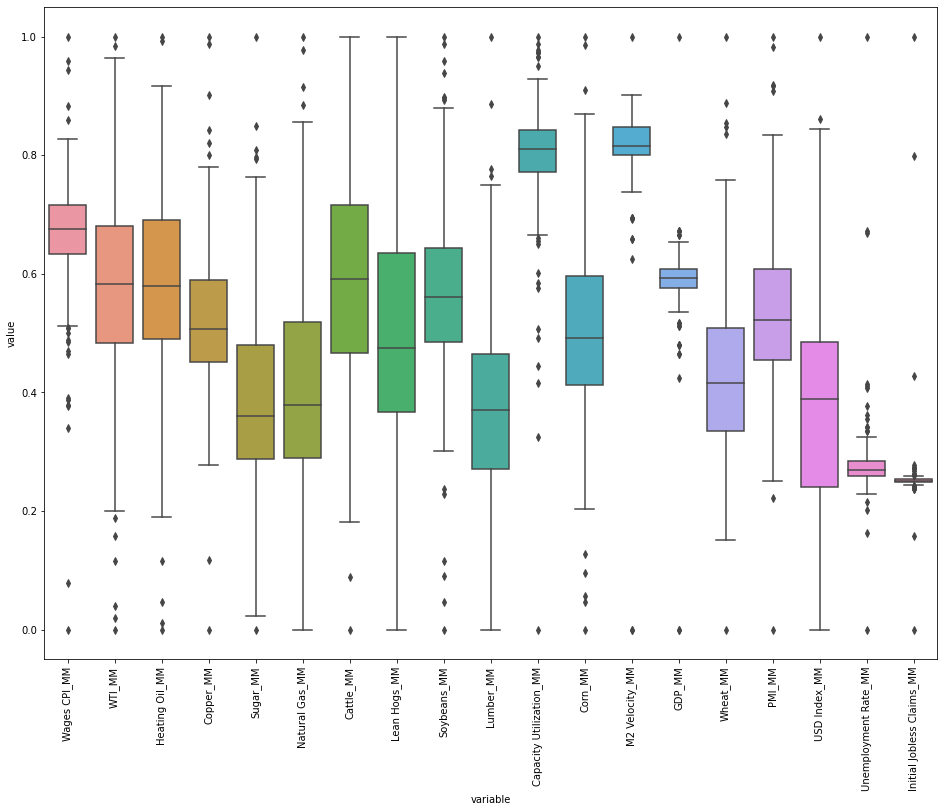

In [85]:
plt.figure(figsize=(16, 12))
chart = sns.boxplot(x='variable', y='value', data=pd.melt(df_X_train_MM))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

`X_test_MM` will not be 'fitted'.

In [86]:
X_test_MM[['Wages CPI_MM', 'WTI_MM', 'Heating Oil_MM','Copper_MM','Sugar_MM',
            'Natural Gas_MM','Cattle_MM','Lean Hogs_MM','Soybeans_MM','Lumber_MM',
                     'Capacity Utilization_MM','Corn_MM','M2 Velocity_MM','GDP_MM','Wheat_MM','PMI_MM',
                     'USD Index_MM','Unemployment Rate_MM','Initial Jobless Claims_MM']] = MM_scaler.transform(X_test_MM[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [87]:
X_test_MM.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wages CPI_MM', 'WTI_MM',
       'Heating Oil_MM', 'Copper_MM', 'Sugar_MM', 'Natural Gas_MM',
       'Cattle_MM', 'Lean Hogs_MM', 'Soybeans_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'Corn_MM', 'M2 Velocity_MM', 'GDP_MM',
       'Wheat_MM', 'PMI_MM', 'USD Index_MM', 'Unemployment Rate_MM',
       'Initial Jobless Claims_MM'],
      dtype='object')

In [88]:
X_test_MM.drop(columns=prev_cols, inplace=True)

In [89]:
X_test_MM.describe()

,Wages CPI_MM,WTI_MM,Heating Oil_MM,Copper_MM,Sugar_MM,Natural Gas_MM,Cattle_MM,Lean Hogs_MM,Soybeans_MM,Lumber_MM,Capacity Utilization_MM,Corn_MM,M2 Velocity_MM,GDP_MM,Wheat_MM,PMI_MM,USD Index_MM,Unemployment Rate_MM,Initial Jobless Claims_MM
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.658167,0.578329,0.574540,0.503137,0.407163,0.402052,0.573052,0.493480,0.567205,0.400266,0.807107,0.507818,0.813450,0.593435,0.424146,0.526115,0.393227,0.267684,0.242664
std,0.112983,0.156718,0.150322,0.117403,0.147291,0.190204,0.176050,0.202375,0.174239,0.219967,0.144096,0.202763,0.101008,0.092471,0.150483,0.130380,0.175635,0.116750,0.068691
min,-0.106642,-0.004300,0.016675,0.010727,0.172100,0.013372,0.061753,0.153016,0.122611,0.024170,-0.036677,0.050282,0.000000,0.000000,0.126514,0.105185,0.008946,-0.149007,-0.275991
25%,0.618067,0.501575,0.494081,0.432523,0.310477,0.264422,0.447394,0.343252,0.461156,0.254830,0.776530,0.392436,0.799763,0.580373,0.316342,0.442963,0.273118,0.254967,0.248711
50%,0.679615,0.580300,0.568844,0.503727,0.377728,0.383424,0.590549,0.465438,0.542730,0.364729,0.815040,0.498874,0.822361,0.594413,0.410108,0.524444,0.378726,0.264901,0.250265
75%,0.709551,0.668136,0.656788,0.562404,0.482163,0.536187,0.705288,0.622547,0.688545,0.500132,0.841056,0.583300,0.849502,0.616576,0.502954,0.585185,0.510609,0.278146,0.251871
max,0.890624,1.174952,0.905002,0.859222,0.888486,0.793287,1.043296,0.996138,1.027624,1.370886,1.426373,1.167095,1.000000,1.000000,1.001081,0.940741,0.839365,1.195364,0.503794


Next `y_train_MM`

In [90]:
MM_scaler.fit(y_train_MM[['Inflation']])

MinMaxScaler()

In [91]:
y_train_MM['Inflation_MM'] = MM_scaler.transform(y_train_MM[['Inflation']])
y_train_MM.drop(columns='Inflation', inplace=True)

In [92]:
y_train_MM.describe()

,Inflation_MM
count,219.000000
mean,0.541342
std,0.096841
min,0.000000
25%,0.497628
50%,0.543658
75%,0.583757
max,1.000000


`y_test_MM` will not be 'fitted'.

In [93]:
y_test_MM['Inflation_MM'] = MM_scaler.transform(y_test_MM[['Inflation']])
y_test_MM.drop(columns='Inflation', inplace=True)

In [94]:
y_test_MM.describe()

,Inflation_MM
count,94.000000
mean,0.552963
std,0.086054
min,0.137919
25%,0.513442
50%,0.547442
75%,0.589885
max,0.864679


In [95]:
reg_all_MM = LinearRegression(X_train_MM,y_train)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_MM    WTI_MM  Heating Oil_MM  Copper_MM  Sugar_MM  \
79       0.679484  0.513019        0.570956   0.513956  0.279879   
147      0.859895  0.764382        0.804423   0.399445  0.470928   
143      0.754299  0.792164        0.863294   0.703253  0.450569   
72       0.556161  0.431969        0.461921   0.480554  0.278491   
305      0.711126  0.567125        0.616934   0.512109  0.341708   
..            ...       ...             ...        ...       ...   
188      0.485511  0.474795        0.375711   0.517000  0.212404   
71       0.522422  0.380595        0.414547   0.462321  0.307018   
106      0.684908  0.417432        0.529757   0.392984  0.479140   
270      0.705364  0.616923        0.596507   0.466586  0.215088   
102      0.631514  0.696465        0.577777   0.518003  0.289065   

     Natural Gas_MM  Cattle_MM  Lean Hogs_MM  Soybeans_MM  Lumber_MM  \
79

In [96]:
lm_MM = LinearRegression().fit(X_train_MM, y_train)

In [97]:
y_tr_pred_MM = lm.predict(X_train_MM)
y_te_pred_MM = lm.predict(X_test_MM)

In [98]:
median_r2_MM = r2_score(y_train_MM, y_tr_pred_MM), r2_score(y_test_MM, y_te_pred_MM)
median_r2_MM

(-8.001094168184874, -10.851334904122465)

In [99]:
median_mae_MM = mean_absolute_error( y_train_MM, y_tr_pred_MM), mean_absolute_error( y_test_MM, y_te_pred_MM )
median_mae_MM

(0.2797624018794911, 0.286548967821825)

In [100]:
median_mse_MM = mean_squared_error( y_train_MM, y_tr_pred_MM ), mean_squared_error( y_test_MM, y_te_pred_MM )
median_mse_MM

(0.08402773481905837, 0.08682983739814941)

This scaling approach conveys that it is not appropriate for this data set.

## 3.6.3 Log Transform ( X & y scaled )<a id='log'></a>

The scalings approach & it's estimated results we will use in this section are as follows:
   * **Log Transformation ( `_Log` )**
      * This approach usually is used with data that has long tails

In [101]:
LG_scaler = PowerTransformer()

First `X_train_LG`

In [102]:
LG_scaler.fit(X_train_LG[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

PowerTransformer()

In [103]:
X_train_LG[['Wage CPI_LG','WTI_LG','Heating Oil_LG','Copper_LG','Sugar_LG',
                     'Natural Gas_LG','Cattle_LG','Lean Hogs_LG','Soybeans_LG','Lumber_LG',
                     'Capacity Utilization_LG','Corn_LG','M2 Velocity_LG','GDP_LG','Wheat_LG','PMI_LG',
                     'USD Index_LG','Unemployment Rate_LG','Initial Jobless Claims_LG']] = LG_scaler.transform(X_train_LG[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

Unlike the previous scaling approaches, we will first investigate visually if they were scaled.

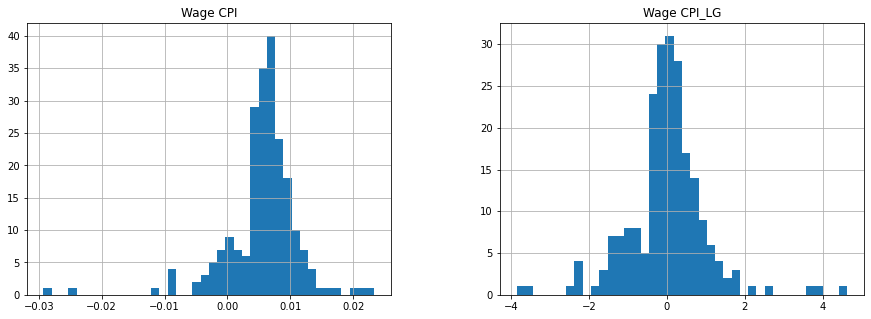

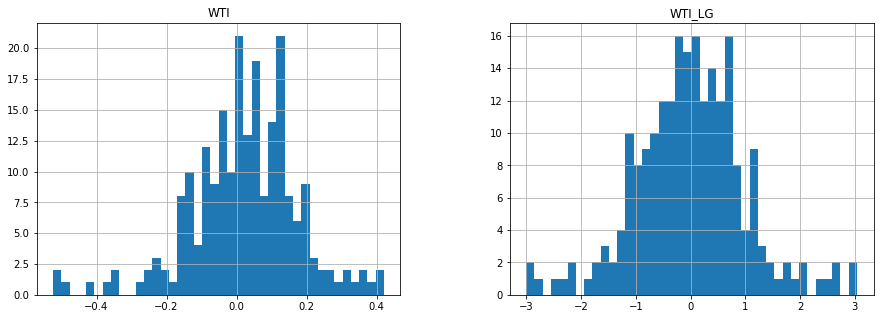

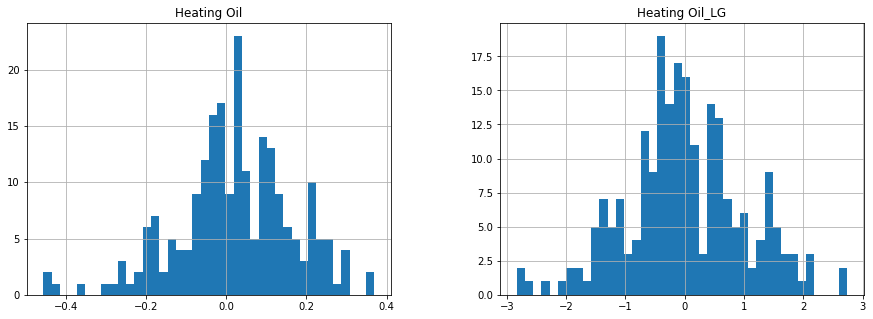

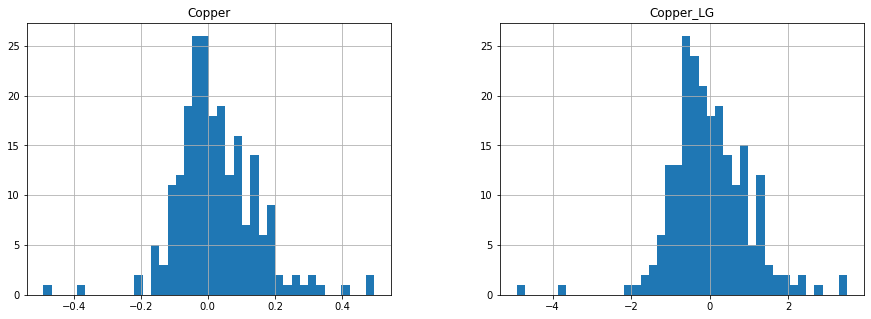

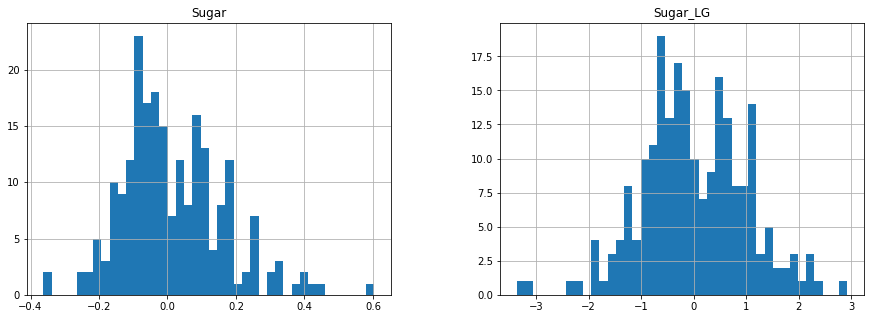

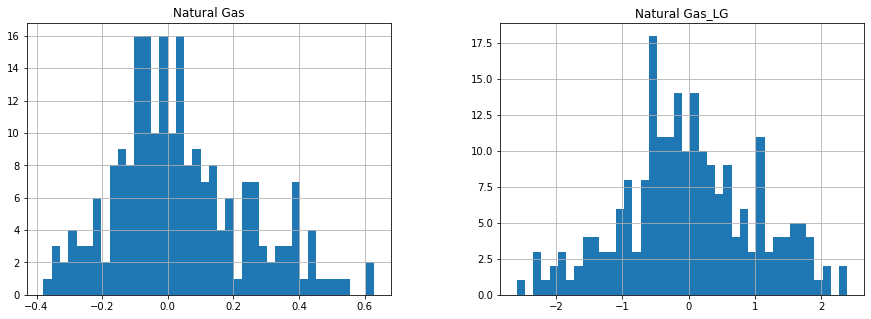

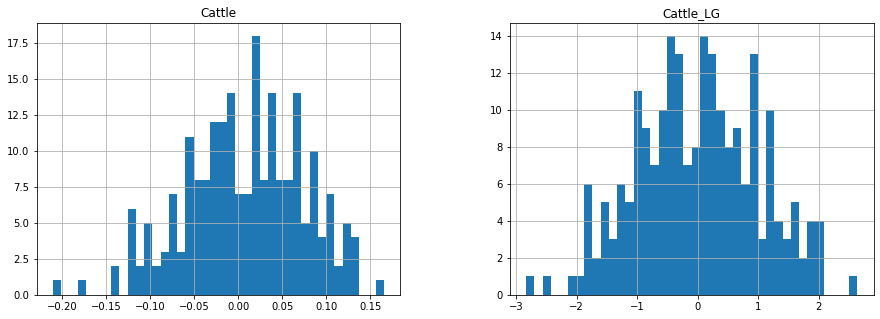

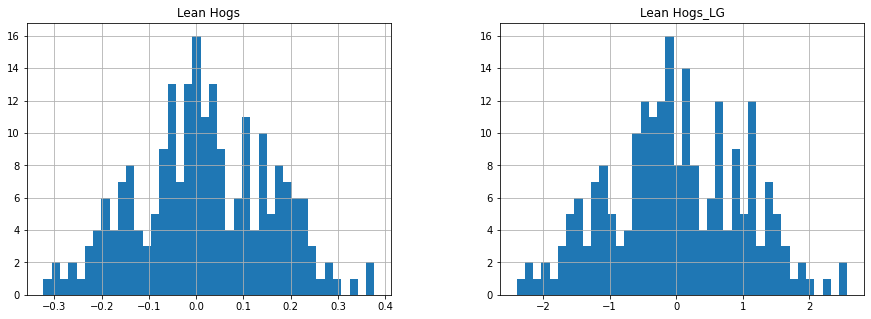

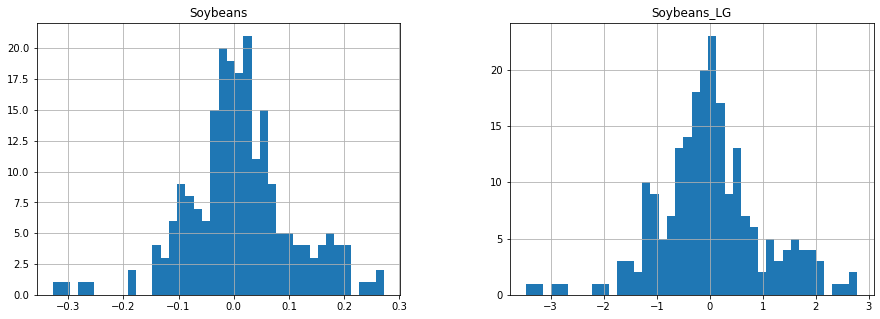

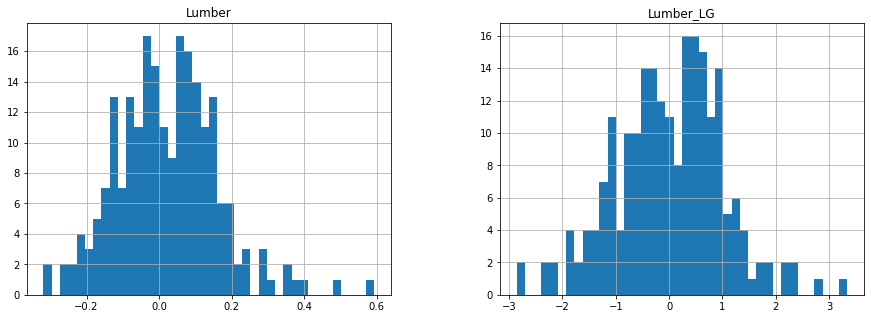

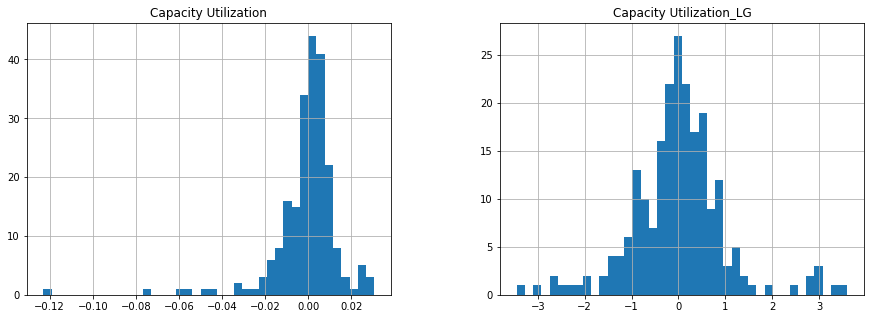

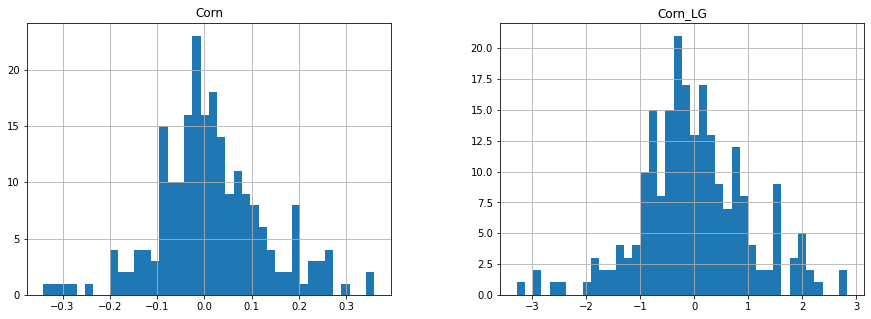

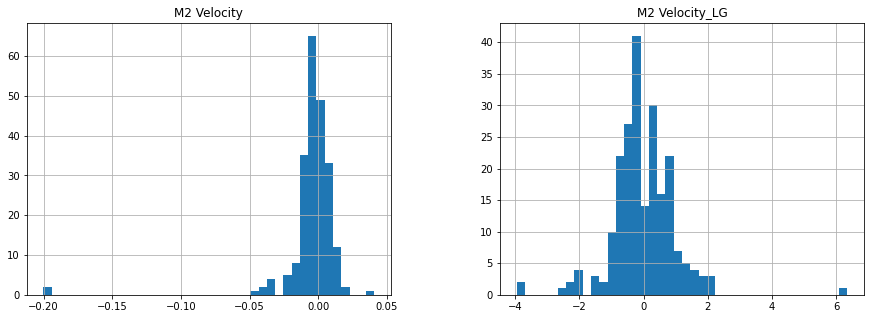

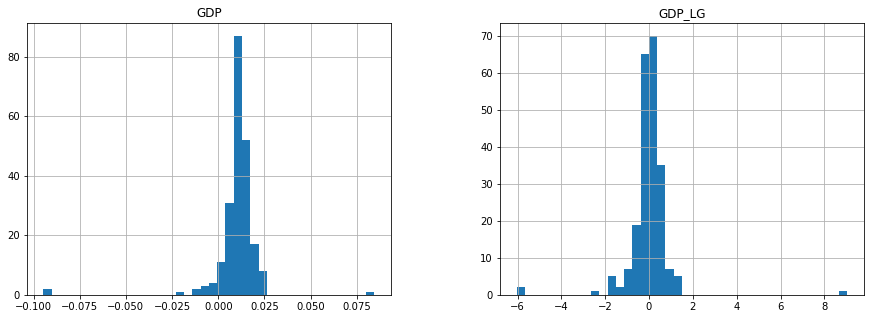

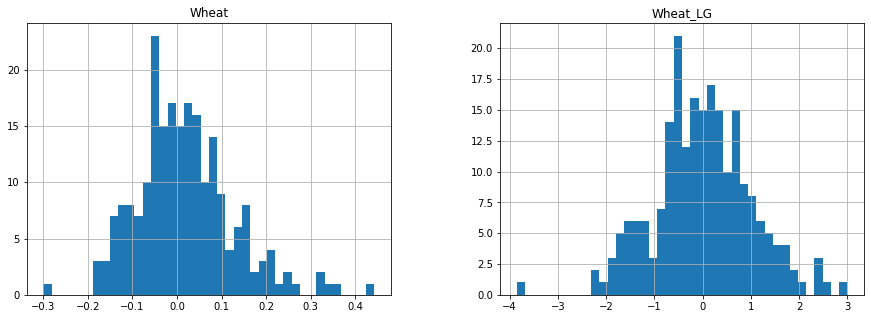

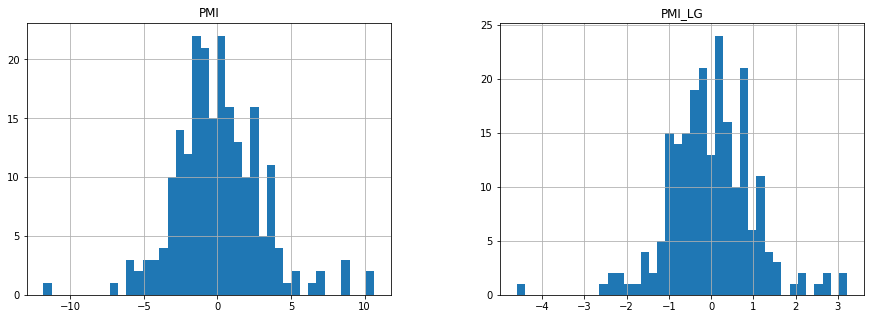

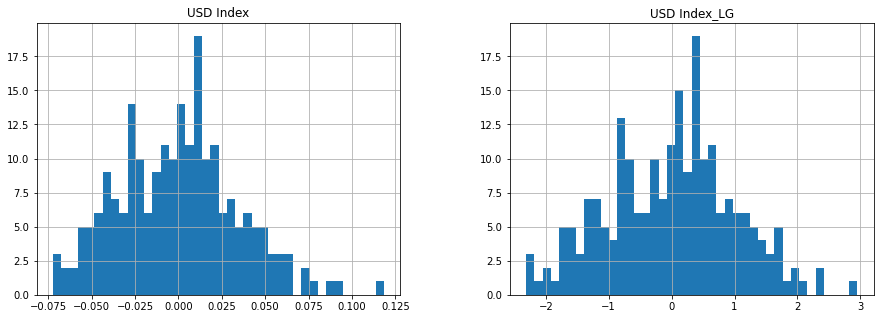

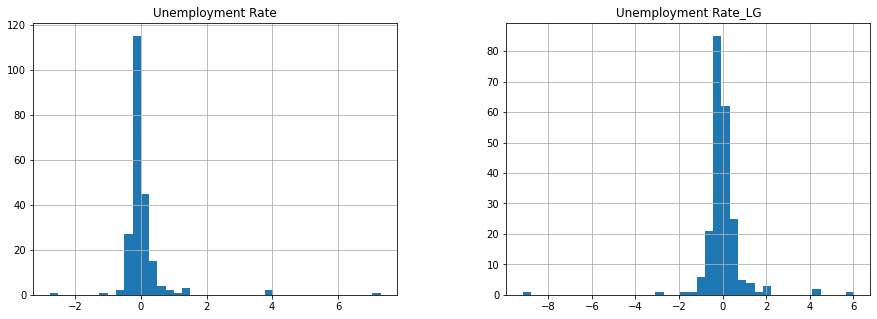

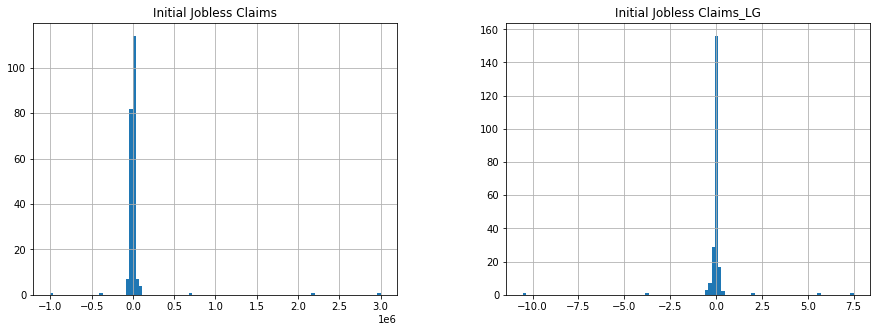

In [106]:
# to visually confirm one of the variables
X_train_LG[['Wage CPI','Wage CPI_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['WTI','WTI_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Heating Oil','Heating Oil_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Copper','Copper_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Sugar','Sugar_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Natural Gas','Natural Gas_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Cattle','Cattle_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Lean Hogs','Lean Hogs_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Soybeans','Soybeans_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Lumber','Lumber_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Capacity Utilization','Capacity Utilization_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Corn','Corn_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['M2 Velocity','M2 Velocity_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['GDP','GDP_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Wheat','Wheat_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['PMI','PMI_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['USD Index','USD Index_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Unemployment Rate','Unemployment Rate_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Initial Jobless Claims','Initial Jobless Claims_LG']].hist(figsize=(15,5),bins=100)
plt.show()

We will also look at a box plot.

In [108]:
df_X_train_LG = pd.DataFrame(data = X_train_LG, columns = ['Wage CPI_LG','WTI_LG','Heating Oil_LG','Copper_LG','Sugar_LG',
                     'Natural Gas_LG','Cattle_LG','Lean Hogs_LG','Soybeans_LG','Lumber_LG',
                     'Capacity Utilization_LG','Corn_LG','M2 Velocity_LG','GDP_LG','Wheat_LG','PMI_LG',
                     'USD Index_LG','Unemployment Rate_LG','Initial Jobless Claims_LG'])

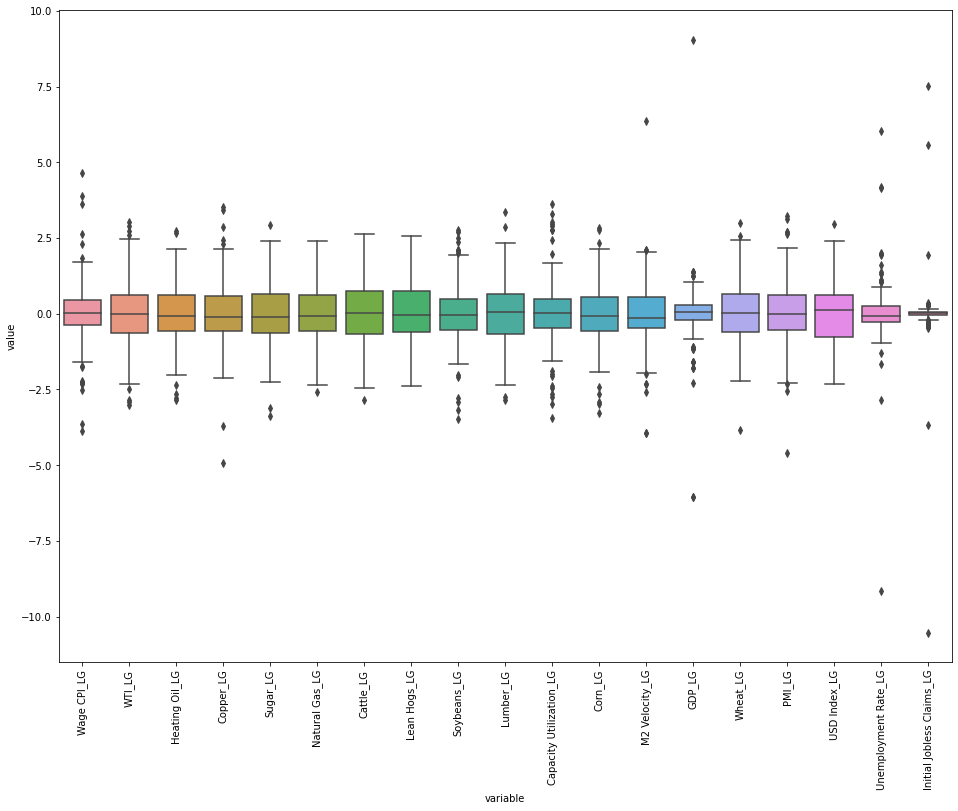

In [109]:
plt.figure(figsize=(16, 12))
chart = sns.boxplot(x='variable', y='value', data=pd.melt(df_X_train_LG))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

While they all seem to work, the following appear to either have an outlier issue or `Log Transform` works very well:
   * `Wages CPI` ( prob outliers -- take a look at boxplot )
   * `Capacity Utilization` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `GDP`
   * `M2 Velocity`
   * `Initial Jobless Claims` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `Unemployment Rate` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )

We will continue with all.

In [110]:
X_train_LG.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_LG', 'WTI_LG',
       'Heating Oil_LG', 'Copper_LG', 'Sugar_LG', 'Natural Gas_LG',
       'Cattle_LG', 'Lean Hogs_LG', 'Soybeans_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'Corn_LG', 'M2 Velocity_LG', 'GDP_LG',
       'Wheat_LG', 'PMI_LG', 'USD Index_LG', 'Unemployment Rate_LG',
       'Initial Jobless Claims_LG'],
      dtype='object')

In [111]:
X_train_LG.drop(columns=prev_cols, inplace=True)

In [112]:
X_train_LG.describe()

,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,1.158383e-16,1.064597e-17,2.547430e-17,-3.127651e-17,4.207695e-17,1.216683e-17,-2.952990e-17,1.267378e-18,2.914969e-17,1.216683e-17,-2.306628e-17,-4.233042e-17,-2.534756e-18,-1.069667e-16,2.154542e-17,-2.712189e-17,1.267378e-17,1.115293e-17,1.901067e-17
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-3.864340e+00,-3.004277e+00,-2.834792e+00,-4.919980e+00,-3.368354e+00,-2.596777e+00,-2.833104e+00,-2.399538e+00,-3.462072e+00,-2.860781e+00,-3.452302e+00,-3.293396e+00,-3.954055e+00,-6.042891e+00,-3.854579e+00,-4.603088e+00,-2.312119e+00,-9.160974e+00,-1.052430e+01
25%,-3.834754e-01,-6.242652e-01,-5.620981e-01,-5.724524e-01,-6.381705e-01,-5.820169e-01,-6.755867e-01,-5.916857e-01,-5.210450e-01,-6.553694e-01,-4.585748e-01,-5.755291e-01,-4.624863e-01,-2.169760e-01,-5.948099e-01,-5.490508e-01,-7.539266e-01,-2.772837e-01,-4.405917e-02
50%,2.178426e-02,-2.571788e-02,-6.522170e-02,-9.491364e-02,-1.007306e-01,-7.720205e-02,9.754577e-03,-5.351127e-02,-4.740022e-02,4.555298e-02,3.360083e-02,-8.262975e-02,-1.487170e-01,4.385546e-02,1.456877e-02,-1.389741e-02,1.084102e-01,-7.173693e-02,2.018497e-02
75%,4.560366e-01,6.162618e-01,6.030152e-01,5.686699e-01,6.629737e-01,6.141918e-01,7.416108e-01,7.399005e-01,4.824446e-01,6.462496e-01,4.711906e-01,5.529895e-01,5.433786e-01,3.000042e-01,6.391738e-01,6.175646e-01,6.226227e-01,2.437991e-01,6.372902e-02
max,4.638354e+00,3.042289e+00,2.742120e+00,3.508829e+00,2.925619e+00,2.399775e+00,2.634560e+00,2.574808e+00,2.775402e+00,3.342907e+00,3.607041e+00,2.839295e+00,6.349962e+00,9.052354e+00,3.001611e+00,3.224333e+00,2.948375e+00,6.018238e+00,7.507126e+00


All have a **Standard Deviation** `std` of 1 & A **Mean** `mean` of 0 so we will continue to the next.

`X_test_LG` will not be fitted.

In [113]:
X_test_LG[['Wage CPI_LG','WTI_LG','Heating Oil_LG','Copper_LG','Sugar_LG',
                     'Natural Gas_LG','Cattle_LG','Lean Hogs_LG','Soybeans_LG','Lumber_LG',
                     'Capacity Utilization_LG','Corn_LG','M2 Velocity_LG','GDP_LG','Wheat_LG','PMI_LG',
                     'USD Index_LG','Unemployment Rate_LG','Initial Jobless Claims_LG']] = LG_scaler.transform(X_test_LG[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [114]:
X_test_LG.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_LG', 'WTI_LG',
       'Heating Oil_LG', 'Copper_LG', 'Sugar_LG', 'Natural Gas_LG',
       'Cattle_LG', 'Lean Hogs_LG', 'Soybeans_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'Corn_LG', 'M2 Velocity_LG', 'GDP_LG',
       'Wheat_LG', 'PMI_LG', 'USD Index_LG', 'Unemployment Rate_LG',
       'Initial Jobless Claims_LG'],
      dtype='object')

In [115]:
X_test_LG.drop(columns=prev_cols, inplace=True)

In [116]:
X_test_LG.describe()

,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.048045,0.003998,-0.047118,-0.161938,0.123452,-0.057807,-0.041445,0.041096,0.007478,0.124216,0.531796,-0.013118,0.123268,0.159476,-0.022034,-0.029349,0.083582,-0.422558,-0.431008
std,0.907698,1.021481,0.853147,0.990601,0.899065,1.013582,0.983241,1.007719,1.095473,1.278398,3.514545,1.220314,1.357368,1.550596,1.001748,0.990415,0.957555,2.500914,2.741489
min,-4.138783,-3.022382,-2.767646,-4.805847,-1.616651,-2.491133,-2.577495,-1.646983,-2.729864,-2.644070,-3.479724,-2.947103,-3.954055,-6.042891,-2.472956,-3.629967,-2.250001,-16.854763,-23.033517
25%,-0.530851,-0.520854,-0.541442,-0.729626,-0.462850,-0.735979,-0.772889,-0.707323,-0.664382,-0.766113,-0.393630,-0.695743,-0.457238,-0.149510,-0.741011,-0.647270,-0.553747,-0.348457,-0.042083
50%,0.070022,-0.042497,-0.124654,-0.124933,0.020949,-0.052213,0.006270,-0.101180,-0.155957,0.007986,0.086237,-0.034993,-0.006430,0.070792,-0.025737,0.008901,0.053312,-0.138910,0.010413
75%,0.388889,0.528902,0.395991,0.354593,0.681843,0.698256,0.681600,0.681418,0.764234,0.861282,0.450895,0.475157,0.614669,0.428787,0.599602,0.458863,0.758699,0.121570,0.048695
max,2.758862,4.589840,2.042987,2.563405,2.545349,1.725179,2.948846,2.555352,2.956581,4.746567,29.132633,3.727261,6.349962,9.052354,3.005600,2.845329,2.295675,6.893727,2.709870


Next `y_train_LG`

In [117]:
LG_scaler.fit(y_train_LG[['Inflation']])

PowerTransformer()

In [118]:
y_train_LG['Inflation_LG'] = LG_scaler.transform(y_train_LG[['Inflation']])
y_train_LG.drop(columns='Inflation', inplace=True)

In [119]:
y_train_LG.describe()

,Inflation_LG
count,2.190000e+02
mean,-1.520853e-18
std,1.002291e+00
min,-5.316536e+00
25%,-4.631936e-01
50%,9.613664e-03
75%,4.287203e-01
max,4.998598e+00


`y_test_LG` will not be 'fitted'.

In [120]:
y_test_LG['Inflation_LG'] = LG_scaler.transform(y_test_LG[['Inflation']])
y_test_LG.drop(columns='Inflation', inplace=True)

In [121]:
y_test_LG.describe()

,Inflation_LG
count,94.000000
mean,0.117902
std,0.892094
min,-4.000923
25%,-0.301644
50%,0.048869
75%,0.493321
max,3.483072


Finally `y_tr_pred_LG`

In [122]:
reg_new_LG = LinearRegression()

In [123]:
reg_new_LG = LogisticRegression(X_train_LG,y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass dual=     Inflation_LG
79      -0.081531
147      0.934459
143      0.223646
72      -0.333447
305     -0.332291
..            ...
188     -0.086196
71      -0.391181
106     -0.073365
270      0.269747
102     -0.558015

[219 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [124]:
lm_LG = LinearRegression().fit(X_train_LG, y_train_LG)

In [125]:
y_tr_pred_LG = lm_LG.predict(X_train_LG)
y_te_pred_LG = lm_LG.predict(X_test_LG)

In [126]:
median_r2_LG = r2_score(y_train_LG, y_tr_pred_LG), r2_score(y_test_LG, y_te_pred_LG)
median_r2_LG

(0.4049094917056897, -0.13878637291967255)

In [127]:
median_mae_LG = mean_absolute_error( y_train_LG, y_tr_pred_LG), mean_absolute_error( y_test_LG, y_te_pred_LG )
median_mae_LG

(0.5348285108080709, 0.6144970158420225)

In [128]:
median_mse_LG = mean_squared_error( y_train_LG, y_tr_pred_LG ), mean_squared_error( y_test_LG, y_te_pred_LG )
median_mse_LG

(0.5950905082943103, 0.8966410257467012)

**Standardization ( X only )** | *Assignment to its respective data frames.*

In [129]:
X_train_SS_y_uns = pd.DataFrame(X_train.copy())
X_test_SS_y_uns = pd.DataFrame(X_test.copy())
y_train_SS_y_uns = pd.DataFrame(y_train.copy())
y_test_SS_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_SS_y_uns = pd.DataFrame(y_pred.copy())

**MinMaxScaler ( X only )** | *Assignment to its respective data frames.*

In [130]:
X_train_MM_y_uns = pd.DataFrame(X_train.copy())
X_test_MM_y_uns = pd.DataFrame(X_test.copy())
y_train_MM_y_uns = pd.DataFrame(y_train.copy())
y_test_MM_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_MM_y_uns = pd.DataFrame(y_pred.copy())

**Log Transformation ( X only )** | *Assignment to its respective data frames.*

In [131]:
X_train_LG_y_uns = pd.DataFrame(X_train.copy())
X_test_LG_y_uns = pd.DataFrame(X_test.copy())
y_train_LG_y_uns = pd.DataFrame(y_train.copy())
y_test_LG_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_LG_y_uns = pd.DataFrame(y_pred.copy())

## 3.6.4 Standardization ( X scaled only )<a id='ss_x'></a>

As a reminder, **we are running through the same process albeit not scaling `y`.**

In [132]:
SS_scaler = StandardScaler()

First `X_train_SS_y_uns`

In [133]:
SS_scaler.fit(X_train_SS_y_uns[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

StandardScaler()

In [134]:
X_train_SS_y_uns[['Wage CPI_SS_yun','WTI_SS_yun','Heating Oil_SS_yun','Copper_SS_yun','Sugar_SS_yun',
                     'Natural Gas_SS_yun','Cattle_SS_yun','Lean Hogs_SS_yun','Soybeans_SS_yun','Lumber_SS_yun',
                     'Capacity Utilization_SS_yun','Corn_SS_yun','M2 Velocity_SS_yun','GDP_SS_yun','Wheat_SS_yun','PMI_SS_yun',
                     'USD Index_SS_yun','Unemployment Rate_SS_yun','Initial Jobless Claims_SS_yun']] = SS_scaler.transform(X_train_SS_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [135]:
X_train_SS_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_SS_yun',
       'WTI_SS_yun', 'Heating Oil_SS_yun', 'Copper_SS_yun', 'Sugar_SS_yun',
       'Natural Gas_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun',
       'Soybeans_SS_yun', 'Lumber_SS_yun', 'Capacity Utilization_SS_yun',
       'Corn_SS_yun', 'M2 Velocity_SS_yun', 'GDP_SS_yun', 'Wheat_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Unemployment Rate_SS_yun',
       'Initial Jobless Claims_SS_yun'],
      dtype='object')

In [136]:
X_train_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [137]:
X_train_SS_y_uns.describe()

,Wage CPI_SS_yun,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,Corn_SS_yun,M2 Velocity_SS_yun,GDP_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun,Unemployment Rate_SS_yun,Initial Jobless Claims_SS_yun
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,3.574006e-17,5.677853e-17,-5.868752e-17,1.001229e-16,-3.802134e-17,-5.576463e-17,-6.843841e-18,-2.788231e-17,1.292725e-17,1.013902e-18,-3.295182e-18,4.106304e-17,-4.095215e-18,-6.311542e-17,-8.364694e-18,1.191335e-17,-3.041707e-18,-3.041707e-18,2.572777e-17
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-6.062318e+00,-3.554258e+00,-3.307158e+00,-4.275317e+00,-2.534857e+00,-2.092879e+00,-3.251186e+00,-2.412667e+00,-3.552930e+00,-2.447766e+00,-7.795038e+00,-3.095494e+00,-9.068365e+00,-8.151908e+00,-2.909327e+00,-4.035795e+00,-2.092087e+00,-3.918715e+00,-3.862139e+00
25%,-2.622508e-01,-5.738987e-01,-5.106932e-01,-5.903736e-01,-6.694239e-01,-6.272489e-01,-6.393442e-01,-5.898264e-01,-5.147225e-01,-6.792113e-01,-2.299928e-01,-5.887966e-01,-1.372215e-01,-1.434068e-01,-6.295338e-01,-5.733419e-01,-7.686037e-01,-2.860298e-01,-1.127636e-01
50%,1.137130e-01,3.652246e-02,-3.546556e-03,-1.277241e-01,-1.992945e-01,-1.776078e-01,6.243175e-02,-5.066135e-02,-3.896558e-02,-2.097464e-02,1.645101e-01,-1.044398e-01,4.201600e-02,8.882293e-02,-7.649249e-02,-6.581613e-02,5.368868e-02,-1.463112e-01,-8.392462e-02
75%,4.862085e-01,6.407473e-01,6.302291e-01,5.419286e-01,5.710310e-01,5.252051e-01,7.571885e-01,7.410920e-01,4.885812e-01,5.957653e-01,4.722769e-01,5.366638e-01,3.889674e-01,3.109964e-01,5.600397e-01,5.883282e-01,5.819297e-01,8.655327e-02,-4.724902e-02
max,3.088234e+00,2.605196e+00,2.396819e+00,3.899899e+00,3.949918e+00,2.963685e+00,2.354074e+00,2.559684e+00,2.721410e+00,4.104874e+00,2.018575e+00,2.995122e+00,2.102794e+00,5.751485e+00,3.904325e+00,3.577091e+00,3.428937e+00,1.014630e+01,1.121655e+01


The **Mean** & **Standard Deviation** look close enough to 0 & 1 respectively; thus, it was scaled correctly. We will now scale the others.

`X_test_SS_y_uns` will not be 'fitted'.

In [138]:
X_test_SS_y_uns[['Wage CPI_SS_yun','WTI_SS_yun','Heating Oil_SS_yun','Copper_SS_yun','Sugar_SS_yun',
                     'Natural Gas_SS_yun','Cattle_SS_yun','Lean Hogs_SS_yun','Soybeans_SS_yun','Lumber_SS_yun',
                     'Capacity Utilization_SS_yun','Corn_SS_yun','M2 Velocity_SS_yun','GDP_SS_yun','Wheat_SS_yun','PMI_SS_yun',
                     'USD Index_SS_yun','Unemployment Rate_SS_yun','Initial Jobless Claims_SS_yun']] = SS_scaler.transform(X_test_SS_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [139]:
X_test_SS_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_SS_yun',
       'WTI_SS_yun', 'Heating Oil_SS_yun', 'Copper_SS_yun', 'Sugar_SS_yun',
       'Natural Gas_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun',
       'Soybeans_SS_yun', 'Lumber_SS_yun', 'Capacity Utilization_SS_yun',
       'Corn_SS_yun', 'M2 Velocity_SS_yun', 'GDP_SS_yun', 'Wheat_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Unemployment Rate_SS_yun',
       'Initial Jobless Claims_SS_yun'],
      dtype='object')

In [140]:
X_test_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [141]:
X_test_SS_y_uns.describe()

,Wage CPI_SS_yun,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,Corn_SS_yun,M2 Velocity_SS_yun,GDP_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun,Unemployment Rate_SS_yun,Initial Jobless Claims_SS_yun
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.039725,0.007935,-0.029998,-0.162066,0.105502,-0.059875,-0.039083,0.041086,0.005910,0.175033,0.125599,-0.002570,0.018809,0.098847,-0.019342,-0.030541,0.078927,-0.153743,-0.203085
std,1.033855,0.965297,0.857436,0.959798,0.955151,0.961777,0.986806,1.006278,1.093236,1.441363,1.414106,1.234954,1.128372,1.285664,1.025338,0.992570,0.969684,1.642094,1.035767
min,-7.038150,-3.580742,-3.212043,-4.187623,-1.418830,-2.025262,-2.905044,-1.651817,-2.783626,-2.289388,-8.154967,-2.789248,-9.068365,-8.151908,-2.047304,-3.235033,-2.042697,-6.014495,-8.023722
25%,-0.406660,-0.464830,-0.488930,-0.739344,-0.521482,-0.755813,-0.743428,-0.705898,-0.659477,-0.777960,-0.174471,-0.705320,-0.134090,-0.082749,-0.753886,-0.663569,-0.584194,-0.332603,-0.111902
50%,0.156537,0.020075,-0.062487,-0.157241,-0.085375,-0.154073,0.058996,-0.098348,-0.147656,-0.057829,0.203446,-0.057043,0.118361,0.112455,-0.114992,-0.043259,-0.001132,-0.192884,-0.088470
75%,0.430470,0.561096,0.439143,0.322455,0.591862,0.618387,0.702137,0.682856,0.767235,0.829421,0.458757,0.457160,0.421551,0.420592,0.517627,0.419153,0.727001,-0.006593,-0.064255
max,2.087383,3.682805,1.854950,2.749010,3.226772,1.918428,2.596760,2.540483,2.894730,6.535160,6.202835,4.012835,2.102794,5.751485,3.911693,3.125957,2.542070,12.894097,3.734413


Although the `mean` & `std` look close to 0 & 1, they are different to those in the scaled `Training` set which was scaled.

As a reminder, `y_train_SS_y_uns` & `y_test_SS_y_uns` will not be scaled or fit in this section.

Now to review the results.

In [142]:
reg_all_SS = LinearRegression(X_train_SS_y_uns,y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wage CPI_SS_yun  WTI_SS_yun  Heating Oil_SS_yun  Copper_SS_yun  \
79          0.155334   -0.394343           -0.050438      -0.073618   
147         1.806193    1.153919            1.281250      -1.009767   
143         0.839935    1.325041            1.617048       1.473924   
72         -0.973142   -0.893565           -0.672374      -0.346680   
305         0.444882   -0.061075            0.211822      -0.088711   
..               ...         ...                 ...            ...   
188        -1.619625   -0.629780           -1.164109      -0.048733   
71         -1.281868   -1.209998           -0.942590      -0.495741   
106         0.204967   -0.983106           -0.285436      -1.062590   
270         0.392150    0.245649            0.095304      -0.460876   
102        -0.283615    0.735583           -0.011529      -0.040529   

     Sugar_SS_yun  Natural Gas_SS_yun 

In [143]:
lm = LinearRegression().fit(X_train_SS_y_uns, y_train_SS_y_uns)

In [144]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred_SS_y_uns = lm.predict(X_train_SS_y_uns)
y_te_pred_SS_y_uns = lm.predict(X_test_SS_y_uns)

In [145]:
# r^2 - train, test
median_r2_SS_y_uns = r2_score(y_train_SS_y_uns, y_tr_pred_SS_y_uns), r2_score(y_test_SS_y_uns, y_te_pred_SS_y_uns)
median_r2_SS_y_uns

(0.41337962352692703, 0.3772004106482717)

In [146]:
median_mae_SS_y_uns = mean_absolute_error( y_train_SS_y_uns, y_tr_pred_SS_y_uns), mean_absolute_error( y_test_SS_y_uns, y_te_pred_SS_y_uns )
median_mae_SS_y_uns

(0.4534709209654319, 0.4459291435336488)

In [147]:
median_mse_SS_y_uns = mean_squared_error( y_train_SS_y_uns, y_tr_pred_SS_y_uns ), mean_squared_error( y_test_SS_y_uns, y_te_pred_SS_y_uns )
median_mse_SS_y_uns

(0.42920564341883566, 0.35762754614105596)

The R^2 results are less than impressive ( i.e. less than a simple coin flip ) but we will proceed.

In this case, I have no missing values so no need to impute.

## 3.6.5 MinMaxScaler ( X scaled only )<a id='mm_x'></a>

In [120]:
MM_scaler = MinMaxScaler()

First `X_train_MM_y_uns`

In [148]:
MM_scaler.fit(X_train_MM_y_uns[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

MinMaxScaler()

In [149]:
X_train_MM_y_uns[['Wage CPI_MM','WTI_MM','Heating Oil_MM','Copper_MM','Sugar_MM',
                     'Natural Gas_MM','Cattle_MM','Lean Hogs_MM','Soybeans_MM','Lumber_MM',
                     'Capacity Utilization_MM','Corn_MM','M2 Velocity_MM','GDP_MM','Wheat_MM','PMI_MM',
                     'USD Index_MM','Unemployment Rate_MM','Initial Jobless Claims_MM']] = MM_scaler.transform(X_train_MM_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [150]:
X_train_MM_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_MM', 'WTI_MM',
       'Heating Oil_MM', 'Copper_MM', 'Sugar_MM', 'Natural Gas_MM',
       'Cattle_MM', 'Lean Hogs_MM', 'Soybeans_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'Corn_MM', 'M2 Velocity_MM', 'GDP_MM',
       'Wheat_MM', 'PMI_MM', 'USD Index_MM', 'Unemployment Rate_MM',
       'Initial Jobless Claims_MM'],
      dtype='object')

In [151]:
X_train_MM_y_uns.drop(columns=prev_cols, inplace=True)

In [152]:
X_train_MM_y_uns.describe()

,Wage CPI_MM,WTI_MM,Heating Oil_MM,Copper_MM,Sugar_MM,Natural Gas_MM,Cattle_MM,Lean Hogs_MM,Soybeans_MM,Lumber_MM,Capacity Utilization_MM,Corn_MM,M2 Velocity_MM,GDP_MM,Wheat_MM,PMI_MM,USD Index_MM,Unemployment Rate_MM,Initial Jobless Claims_MM
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.662508,0.577041,0.579799,0.522961,0.390894,0.413894,0.580024,0.485217,0.566264,0.373554,0.794309,0.508240,0.811766,0.586325,0.426985,0.530127,0.378931,0.278614,0.256132
std,0.109533,0.162724,0.175718,0.122601,0.154561,0.198216,0.178813,0.201573,0.159744,0.152960,0.102133,0.164563,0.089721,0.072090,0.147100,0.131657,0.181541,0.071261,0.066471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.633849,0.483867,0.490266,0.450746,0.287664,0.289847,0.465963,0.366595,0.484227,0.269900,0.770873,0.411567,0.799482,0.576011,0.334592,0.454815,0.239717,0.258278,0.248654
50%,0.674935,0.582971,0.579177,0.507337,0.360161,0.378769,0.591162,0.475028,0.560053,0.370353,0.811072,0.491092,0.815527,0.592714,0.415759,0.521481,0.388655,0.268212,0.250566
75%,0.715643,0.681068,0.690288,0.589250,0.478951,0.517760,0.715109,0.634259,0.644133,0.464474,0.842433,0.596353,0.846585,0.608693,0.509179,0.607407,0.484333,0.284768,0.252999
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The `Maximum` & `Minimum` are **1 & 0 respectively; it appears to be realigning according to the MinMaxScaler appropriately**

`X_test_MM_y_uns` will not be 'fitted'.

In [153]:
X_test_MM_y_uns[['Wage CPI_MM','WTI_MM','Heating Oil_MM','Copper_MM','Sugar_MM',
                     'Natural Gas_MM','Cattle_MM','Lean Hogs_MM','Soybeans_MM','Lumber_MM',
                     'Capacity Utilization_MM','Corn_MM','M2 Velocity_MM','GDP_MM','Wheat_MM','PMI_MM',
                     'USD Index_MM','Unemployment Rate_MM','Initial Jobless Claims_MM']] = MM_scaler.transform(X_test_MM_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [154]:
X_test_MM_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_MM', 'WTI_MM',
       'Heating Oil_MM', 'Copper_MM', 'Sugar_MM', 'Natural Gas_MM',
       'Cattle_MM', 'Lean Hogs_MM', 'Soybeans_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'Corn_MM', 'M2 Velocity_MM', 'GDP_MM',
       'Wheat_MM', 'PMI_MM', 'USD Index_MM', 'Unemployment Rate_MM',
       'Initial Jobless Claims_MM'],
      dtype='object')

In [155]:
X_test_MM_y_uns.drop(columns=prev_cols, inplace=True)

In [156]:
X_test_MM.describe()

,Wages CPI_MM,WTI_MM,Heating Oil_MM,Copper_MM,Sugar_MM,Natural Gas_MM,Cattle_MM,Lean Hogs_MM,Soybeans_MM,Lumber_MM,Capacity Utilization_MM,Corn_MM,M2 Velocity_MM,GDP_MM,Wheat_MM,PMI_MM,USD Index_MM,Unemployment Rate_MM,Initial Jobless Claims_MM
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.658167,0.578329,0.574540,0.503137,0.407163,0.402052,0.573052,0.493480,0.567205,0.400266,0.807107,0.507818,0.813450,0.593435,0.424146,0.526115,0.393227,0.267684,0.242664
std,0.112983,0.156718,0.150322,0.117403,0.147291,0.190204,0.176050,0.202375,0.174239,0.219967,0.144096,0.202763,0.101008,0.092471,0.150483,0.130380,0.175635,0.116750,0.068691
min,-0.106642,-0.004300,0.016675,0.010727,0.172100,0.013372,0.061753,0.153016,0.122611,0.024170,-0.036677,0.050282,0.000000,0.000000,0.126514,0.105185,0.008946,-0.149007,-0.275991
25%,0.618067,0.501575,0.494081,0.432523,0.310477,0.264422,0.447394,0.343252,0.461156,0.254830,0.776530,0.392436,0.799763,0.580373,0.316342,0.442963,0.273118,0.254967,0.248711
50%,0.679615,0.580300,0.568844,0.503727,0.377728,0.383424,0.590549,0.465438,0.542730,0.364729,0.815040,0.498874,0.822361,0.594413,0.410108,0.524444,0.378726,0.264901,0.250265
75%,0.709551,0.668136,0.656788,0.562404,0.482163,0.536187,0.705288,0.622547,0.688545,0.500132,0.841056,0.583300,0.849502,0.616576,0.502954,0.585185,0.510609,0.278146,0.251871
max,0.890624,1.174952,0.905002,0.859222,0.888486,0.793287,1.043296,0.996138,1.027624,1.370886,1.426373,1.167095,1.000000,1.000000,1.001081,0.940741,0.839365,1.195364,0.503794


The `min` & `max` are 0 & 1 confirming it has been scaled properly.

As a reminder, `y_train_MM_y_uns` & `y_test_MM_y_uns` will not be scaled or fit.

In [157]:
reg_all_MM_y_uns = LinearRegression(X_train_MM_y_uns,y_train_MM_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wage CPI_MM    WTI_MM  Heating Oil_MM  Copper_MM  Sugar_MM  \
79      0.679484  0.513019        0.570956   0.513956  0.279879   
147     0.859895  0.764382        0.804423   0.399445  0.470928   
143     0.754299  0.792164        0.863294   0.703253  0.450569   
72      0.556161  0.431969        0.461921   0.480554  0.278491   
305     0.711126  0.567125        0.616934   0.512109  0.341708   
..           ...       ...             ...        ...       ...   
188     0.485511  0.474795        0.375711   0.517000  0.212404   
71      0.522422  0.380595        0.414547   0.462321  0.307018   
106     0.684908  0.417432        0.529757   0.392984  0.479140   
270     0.705364  0.616923        0.596507   0.466586  0.215088   
102     0.631514  0.696465        0.577777   0.518003  0.289065   

     Natural Gas_MM  Cattle_MM  Lean Hogs_MM  Soybeans_MM  Lumber_MM  \
79         0.6

In [158]:
lm_MM_y_uns = LinearRegression().fit(X_train_MM_y_uns, y_train_MM_y_uns)

In [159]:
y_tr_pred_MM_y_uns = lm.predict(X_train_MM_y_uns)
y_te_pred_MM_y_uns = lm.predict(X_test_MM_y_uns)

In [160]:
median_r2_MM_y_uns = r2_score(y_train_MM_y_uns, y_tr_pred_MM_y_uns), r2_score(y_test_MM_y_uns, y_te_pred_MM_y_uns)
median_r2_MM_y_uns

(-0.031025366165671864, 0.0436326587288538)

In [161]:
median_mae_MM_y_uns = mean_absolute_error( y_train_MM_y_uns, y_tr_pred_MM_y_uns), mean_absolute_error( y_test_MM_y_uns, y_te_pred_MM_y_uns )
median_mae_MM_y_uns

(0.6081604226182151, 0.5202523810158185)

In [162]:
median_mse_MM_y_uns = mean_squared_error( y_train_MM_y_uns, y_tr_pred_MM_y_uns ), mean_squared_error( y_test_MM_y_uns, y_te_pred_MM_y_uns )
median_mse_MM_y_uns

(0.7543582245247672, 0.5491707305463347)

This scaling approach conveys that it is not appropriate for this data set.

## 3.6.6 Log Transform ( X scaled only )<a id='log_x'></a>

In [136]:
LG_scaler = PowerTransformer()

First `X_train_LG_y_uns`

In [163]:
LG_scaler.fit(X_train_LG_y_uns[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

PowerTransformer()

In [164]:
X_train_LG_y_uns[['Wage CPI_LG','WTI_LG','Heating Oil_LG','Copper_LG','Sugar_LG',
                     'Natural Gas_LG','Cattle_LG','Lean Hogs_LG','Soybeans_LG','Lumber_LG',
                     'Capacity Utilization_LG','Corn_LG','M2 Velocity_LG','GDP_LG','Wheat_LG','PMI_LG',
                     'USD Index_LG','Unemployment Rate_LG','Initial Jobless Claims_LG']] = LG_scaler.transform(X_train_LG_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [165]:
X_train_LG_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_LG', 'WTI_LG',
       'Heating Oil_LG', 'Copper_LG', 'Sugar_LG', 'Natural Gas_LG',
       'Cattle_LG', 'Lean Hogs_LG', 'Soybeans_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'Corn_LG', 'M2 Velocity_LG', 'GDP_LG',
       'Wheat_LG', 'PMI_LG', 'USD Index_LG', 'Unemployment Rate_LG',
       'Initial Jobless Claims_LG'],
      dtype='object')

In [166]:
X_train_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [167]:
X_train_LG.describe()

,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,1.158383e-16,1.064597e-17,2.547430e-17,-3.127651e-17,4.207695e-17,1.216683e-17,-2.952990e-17,1.267378e-18,2.914969e-17,1.216683e-17,-2.306628e-17,-4.233042e-17,-2.534756e-18,-1.069667e-16,2.154542e-17,-2.712189e-17,1.267378e-17,1.115293e-17,1.901067e-17
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-3.864340e+00,-3.004277e+00,-2.834792e+00,-4.919980e+00,-3.368354e+00,-2.596777e+00,-2.833104e+00,-2.399538e+00,-3.462072e+00,-2.860781e+00,-3.452302e+00,-3.293396e+00,-3.954055e+00,-6.042891e+00,-3.854579e+00,-4.603088e+00,-2.312119e+00,-9.160974e+00,-1.052430e+01
25%,-3.834754e-01,-6.242652e-01,-5.620981e-01,-5.724524e-01,-6.381705e-01,-5.820169e-01,-6.755867e-01,-5.916857e-01,-5.210450e-01,-6.553694e-01,-4.585748e-01,-5.755291e-01,-4.624863e-01,-2.169760e-01,-5.948099e-01,-5.490508e-01,-7.539266e-01,-2.772837e-01,-4.405917e-02
50%,2.178426e-02,-2.571788e-02,-6.522170e-02,-9.491364e-02,-1.007306e-01,-7.720205e-02,9.754577e-03,-5.351127e-02,-4.740022e-02,4.555298e-02,3.360083e-02,-8.262975e-02,-1.487170e-01,4.385546e-02,1.456877e-02,-1.389741e-02,1.084102e-01,-7.173693e-02,2.018497e-02
75%,4.560366e-01,6.162618e-01,6.030152e-01,5.686699e-01,6.629737e-01,6.141918e-01,7.416108e-01,7.399005e-01,4.824446e-01,6.462496e-01,4.711906e-01,5.529895e-01,5.433786e-01,3.000042e-01,6.391738e-01,6.175646e-01,6.226227e-01,2.437991e-01,6.372902e-02
max,4.638354e+00,3.042289e+00,2.742120e+00,3.508829e+00,2.925619e+00,2.399775e+00,2.634560e+00,2.574808e+00,2.775402e+00,3.342907e+00,3.607041e+00,2.839295e+00,6.349962e+00,9.052354e+00,3.001611e+00,3.224333e+00,2.948375e+00,6.018238e+00,7.507126e+00


All have a **Standard Deviation** `std` of 1 so we will continue to the next.

`X_test_LG_y_uns` will not be fitted.

In [169]:
X_test_LG_y_uns[['Wage CPI_LG','WTI_LG','Heating Oil_LG','Copper_LG','Sugar_LG',
                     'Natural Gas_LG','Cattle_LG','Lean Hogs_LG','Soybeans_LG','Lumber_LG',
                     'Capacity Utilization_LG','Corn_LG','M2 Velocity_LG','GDP_LG','Wheat_LG','PMI_LG',
                     'USD Index_LG','Unemployment Rate_LG','Initial Jobless Claims_LG']] = LG_scaler.transform(X_test_LG_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [170]:
X_test_LG_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_LG', 'WTI_LG',
       'Heating Oil_LG', 'Copper_LG', 'Sugar_LG', 'Natural Gas_LG',
       'Cattle_LG', 'Lean Hogs_LG', 'Soybeans_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'Corn_LG', 'M2 Velocity_LG', 'GDP_LG',
       'Wheat_LG', 'PMI_LG', 'USD Index_LG', 'Unemployment Rate_LG',
       'Initial Jobless Claims_LG'],
      dtype='object')

In [171]:
X_test_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [172]:
X_test_LG_y_uns.describe()

,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.048045,0.003998,-0.047118,-0.161938,0.123452,-0.057807,-0.041445,0.041096,0.007478,0.124216,0.531796,-0.013118,0.123268,0.159476,-0.022034,-0.029349,0.083582,-0.422558,-0.431008
std,0.907698,1.021481,0.853147,0.990601,0.899065,1.013582,0.983241,1.007719,1.095473,1.278398,3.514545,1.220314,1.357368,1.550596,1.001748,0.990415,0.957555,2.500914,2.741489
min,-4.138783,-3.022382,-2.767646,-4.805847,-1.616651,-2.491133,-2.577495,-1.646983,-2.729864,-2.644070,-3.479724,-2.947103,-3.954055,-6.042891,-2.472956,-3.629967,-2.250001,-16.854763,-23.033517
25%,-0.530851,-0.520854,-0.541442,-0.729626,-0.462850,-0.735979,-0.772889,-0.707323,-0.664382,-0.766113,-0.393630,-0.695743,-0.457238,-0.149510,-0.741011,-0.647270,-0.553747,-0.348457,-0.042083
50%,0.070022,-0.042497,-0.124654,-0.124933,0.020949,-0.052213,0.006270,-0.101180,-0.155957,0.007986,0.086237,-0.034993,-0.006430,0.070792,-0.025737,0.008901,0.053312,-0.138910,0.010413
75%,0.388889,0.528902,0.395991,0.354593,0.681843,0.698256,0.681600,0.681418,0.764234,0.861282,0.450895,0.475157,0.614669,0.428787,0.599602,0.458863,0.758699,0.121570,0.048695
max,2.758862,4.589840,2.042987,2.563405,2.545349,1.725179,2.948846,2.555352,2.956581,4.746567,29.132633,3.727261,6.349962,9.052354,3.005600,2.845329,2.295675,6.893727,2.709870


As a reminder, `y_train_LG_y_uns` & `y_test_LG_y_uns` will not be scaled or fit.

In [173]:
reg_new_LG = LogisticRegression(X_train_LG_y_uns,y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass dual=     Inflation
79      -0.111
147      0.744
143      0.149
72      -0.328
305     -0.327
..         ...
188     -0.115
71      -0.378
106     -0.104
270      0.188
102     -0.523

[219 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [174]:
lm_LG = LinearRegression().fit(X_train_LG_y_uns, y_train_LG_y_uns)

In [175]:
y_tr_pred_LG_y_uns = lm_LG.predict(X_train_LG_y_uns)
y_te_pred_LG_y_uns = lm_LG.predict(X_test_LG_y_uns)

In [176]:
median_r2_LG_y_uns = r2_score(y_train_LG_y_uns, y_tr_pred_LG_y_uns), r2_score(y_test_LG_y_uns, y_te_pred_LG_y_uns)
median_r2_LG_y_uns

(0.4075382667202002, -0.10822673274811723)

In [177]:
median_mae_LG_y_uns = mean_absolute_error( y_train_LG_y_uns, y_tr_pred_LG_y_uns), mean_absolute_error( y_test_LG_y_uns, y_te_pred_LG_y_uns )
median_mae_LG_y_uns

(0.4574079188297128, 0.5198843700805041)

In [178]:
median_mse_LG_y_uns = mean_squared_error( y_train_LG_y_uns, y_tr_pred_LG_y_uns ), mean_squared_error( y_test_LG_y_uns, y_te_pred_LG_y_uns )
median_mse_LG_y_uns

(0.43347952037098625, 0.6363722998166571)

## 3.7 Scaling Review<a id='scale_rev'></a>

A noteable amount of information was 're-arranged' so we will quickly show the r2-values for all of the scaling approaches side by side:

In [179]:
print(' Results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),
      '\n','MM Train |',round(median_r2_MM[0],4),'  Test', round(median_r2_MM[1],4),
      '\n','LG Train |',round(median_r2_LG[0],4),'  Test', round(median_r2_LG[1],4),'\n','\n',
     'Results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns[0],4),'  Test', round(median_r2_SS_y_uns[1],4),
      '\n','MM Train |',round(median_r2_MM_y_uns[0],4),' Test', round(median_r2_MM_y_uns[1],4),
      '\n','LG Train |',round(median_r2_LG_y_uns[0],4),'  Test', round(median_r2_LG_y_uns[1],4))

 Results for X & y scaled below 
 SS Train | 0.4019   Test 0.3856 
 MM Train | -8.0011   Test -10.8513 
 LG Train | 0.4049   Test -0.1388 
 
 Results for X only scaled below 
 SS Train | 0.4134   Test 0.3772 
 MM Train | -0.031  Test 0.0436 
 LG Train | 0.4075   Test -0.1082


Of the three ( 3 ) scalers, `MinMax` ( `MM` ) presented poor results on both scaling & unscaling `y`. 

With the exception of `Log Transformation` ( `LG` ) `Test` data on a both scaled & unscaled `y`, `Standard Scaler` ( `SS` ) & `LG` present the best outcomes. **These results lead me to believe that a healthy combination between `SS` & `LG` "may" present even better outcomes if they are balanced correctly. This balancing act will need to be done on an unscaled `y` but I am comfortable with that as:**
   * `SS` presented better results on the `Training` data
     * <i>marginally worse on the `Test` data </i>
   * `LG` presented marginally better results on the `Test` data
     * <i>maringally worse on the `Training` data</i>

We will now investigate these finds, as per the above, even further in the next section.

## 3.8 Balancing SS & LG to unscaled y<a id='ss_log'></a>

We will now start from the beginning & assign the `Train` / `Test` splits to a new set of variables for both `SS` & `LG`.

**StandardScaler ( X only ) for the SS & LG Combination** | *Assignment to its respective data frames.*

In [180]:
X_tr_SS_y_uns = pd.DataFrame(X_train.copy())
X_te_SS_y_uns = pd.DataFrame(X_test.copy())

**Log Transformation ( X only ) for the SS & LG Combination** | *Assignment to its respective data frames.*

In [181]:
X_tr_LG_y_uns = pd.DataFrame(X_train.copy())
X_te_LG_y_uns = pd.DataFrame(X_test.copy())

**The y variables for the SS & LG Combination** | *Assignment to its respective data frames.*

In [182]:
y_tr_y_uns = pd.DataFrame(y_train.copy())
y_te_y_uns = pd.DataFrame(y_test.copy())
y_train_pred_y_uns = pd.DataFrame(y_pred.copy())

I will now look at the variables with out scaling to determine which ones should be `LG` scaled. This is an entirely visual exercise.

Further to our previous examination, the following variables may need to be `LG` scale:
   * `Wages CPI` ( prob outliers -- take a look at boxplot )
   * `Capacity Utilization` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `GDP`
   * `M2 Velocity`
   * `Initial Jobless Claims` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `Unemployment Rate` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )

We will first scale `LG` & remove those not in the list above.

## 3.8.1 LG to unscaled y<a id='lg_uns'></a>

In [183]:
LG_scaler = PowerTransformer()

First `X_tr_LG_y_uns`

In [184]:
LG_scaler.fit(X_tr_LG_y_uns[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

PowerTransformer()

In [185]:
X_tr_LG_y_uns[['Wage CPI_LG','WTI_LG','Heating Oil_LG','Copper_LG','Sugar_LG',
                     'Natural Gas_LG','Cattle_LG','Lean Hogs_LG','Soybeans_LG','Lumber_LG',
                     'Capacity Utilization_LG','Corn_LG','M2 Velocity_LG','GDP_LG','Wheat_LG','PMI_LG',
                     'USD Index_LG','Unemployment Rate_LG','Initial Jobless Claims_LG']] = LG_scaler.transform(X_tr_LG_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [186]:
X_tr_LG_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_LG', 'WTI_LG',
       'Heating Oil_LG', 'Copper_LG', 'Sugar_LG', 'Natural Gas_LG',
       'Cattle_LG', 'Lean Hogs_LG', 'Soybeans_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'Corn_LG', 'M2 Velocity_LG', 'GDP_LG',
       'Wheat_LG', 'PMI_LG', 'USD Index_LG', 'Unemployment Rate_LG',
       'Initial Jobless Claims_LG'],
      dtype='object')

In [187]:
X_tr_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [188]:
non_LG = ['WTI_LG','Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'PMI_LG', 'USD Index_LG']

In [189]:
X_tr_LG_y_uns.drop(columns=non_LG, inplace=True)

In [190]:
X_tr_LG_y_uns.describe()

,Wage CPI_LG,Capacity Utilization_LG,M2 Velocity_LG,GDP_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,1.158383e-16,-2.306628e-17,-2.534756e-18,-1.069667e-16,1.115293e-17,1.901067e-17
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-3.864340e+00,-3.452302e+00,-3.954055e+00,-6.042891e+00,-9.160974e+00,-1.052430e+01
25%,-3.834754e-01,-4.585748e-01,-4.624863e-01,-2.169760e-01,-2.772837e-01,-4.405917e-02
50%,2.178426e-02,3.360083e-02,-1.487170e-01,4.385546e-02,-7.173693e-02,2.018497e-02
75%,4.560366e-01,4.711906e-01,5.433786e-01,3.000042e-01,2.437991e-01,6.372902e-02
max,4.638354e+00,3.607041e+00,6.349962e+00,9.052354e+00,6.018238e+00,7.507126e+00


All have a **Standard Deviation** `std` of 1 so we will continue to the next.

`X_te_LG_y_uns` will not be fitted.

In [191]:
X_te_LG_y_uns[['Wage CPI_LG','WTI_LG','Heating Oil_LG','Copper_LG','Sugar_LG',
                     'Natural Gas_LG','Cattle_LG','Lean Hogs_LG','Soybeans_LG','Lumber_LG',
                     'Capacity Utilization_LG','Corn_LG','M2 Velocity_LG','GDP_LG','Wheat_LG','PMI_LG',
                     'USD Index_LG','Unemployment Rate_LG','Initial Jobless Claims_LG']] = LG_scaler.transform(X_te_LG_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [192]:
X_te_LG_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_LG', 'WTI_LG',
       'Heating Oil_LG', 'Copper_LG', 'Sugar_LG', 'Natural Gas_LG',
       'Cattle_LG', 'Lean Hogs_LG', 'Soybeans_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'Corn_LG', 'M2 Velocity_LG', 'GDP_LG',
       'Wheat_LG', 'PMI_LG', 'USD Index_LG', 'Unemployment Rate_LG',
       'Initial Jobless Claims_LG'],
      dtype='object')

In [193]:
X_te_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [194]:
X_te_LG_y_uns.drop(columns=non_LG, inplace=True)

In [195]:
X_te_LG_y_uns.describe()

,Wage CPI_LG,Capacity Utilization_LG,M2 Velocity_LG,GDP_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.048045,0.531796,0.123268,0.159476,-0.422558,-0.431008
std,0.907698,3.514545,1.357368,1.550596,2.500914,2.741489
min,-4.138783,-3.479724,-3.954055,-6.042891,-16.854763,-23.033517
25%,-0.530851,-0.393630,-0.457238,-0.149510,-0.348457,-0.042083
50%,0.070022,0.086237,-0.006430,0.070792,-0.138910,0.010413
75%,0.388889,0.450895,0.614669,0.428787,0.121570,0.048695
max,2.758862,29.132633,6.349962,9.052354,6.893727,2.709870


Looks good.

## 3.8.2 SS to unscaled y<a id='ss_uns'></a>

In [196]:
SS_scaler = StandardScaler()

First `X_tr_SS_y_uns`

In [197]:
SS_scaler.fit(X_tr_SS_y_uns[['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

StandardScaler()

In [198]:
X_tr_SS_y_uns[['Wage CPI_SS_yun','WTI_SS_yun','Heating Oil_SS_yun','Copper_SS_yun','Sugar_SS_yun',
                     'Natural Gas_SS_yun','Cattle_SS_yun','Lean Hogs_SS_yun','Soybeans_SS_yun','Lumber_SS_yun',
                     'Capacity Utilization_SS_yun','Corn_SS_yun','M2 Velocity_SS_yun','GDP_SS_yun','Wheat_SS_yun','PMI_SS_yun',
                     'USD Index_SS_yun','Unemployment Rate_SS_yun','Initial Jobless Claims_SS_yun']] = SS_scaler.transform(X_tr_SS_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [199]:
X_tr_SS_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_SS_yun',
       'WTI_SS_yun', 'Heating Oil_SS_yun', 'Copper_SS_yun', 'Sugar_SS_yun',
       'Natural Gas_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun',
       'Soybeans_SS_yun', 'Lumber_SS_yun', 'Capacity Utilization_SS_yun',
       'Corn_SS_yun', 'M2 Velocity_SS_yun', 'GDP_SS_yun', 'Wheat_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Unemployment Rate_SS_yun',
       'Initial Jobless Claims_SS_yun'],
      dtype='object')

In [201]:
LG_cols = ['Wage CPI_SS_yun','Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun',
       'Initial Jobless Claims_SS_yun','Unemployment Rate_SS_yun']

In [202]:
X_tr_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [203]:
X_tr_SS_y_uns.drop(columns=LG_cols, inplace=True)

In [205]:
X_tr_SS_y_uns.describe()

,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Corn_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,5.677853e-17,-5.868752e-17,1.001229e-16,-3.802134e-17,-5.576463e-17,-6.843841e-18,-2.788231e-17,1.292725e-17,1.013902e-18,4.106304e-17,-8.364694e-18,1.191335e-17,-3.041707e-18
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-3.554258e+00,-3.307158e+00,-4.275317e+00,-2.534857e+00,-2.092879e+00,-3.251186e+00,-2.412667e+00,-3.552930e+00,-2.447766e+00,-3.095494e+00,-2.909327e+00,-4.035795e+00,-2.092087e+00
25%,-5.738987e-01,-5.106932e-01,-5.903736e-01,-6.694239e-01,-6.272489e-01,-6.393442e-01,-5.898264e-01,-5.147225e-01,-6.792113e-01,-5.887966e-01,-6.295338e-01,-5.733419e-01,-7.686037e-01
50%,3.652246e-02,-3.546556e-03,-1.277241e-01,-1.992945e-01,-1.776078e-01,6.243175e-02,-5.066135e-02,-3.896558e-02,-2.097464e-02,-1.044398e-01,-7.649249e-02,-6.581613e-02,5.368868e-02
75%,6.407473e-01,6.302291e-01,5.419286e-01,5.710310e-01,5.252051e-01,7.571885e-01,7.410920e-01,4.885812e-01,5.957653e-01,5.366638e-01,5.600397e-01,5.883282e-01,5.819297e-01
max,2.605196e+00,2.396819e+00,3.899899e+00,3.949918e+00,2.963685e+00,2.354074e+00,2.559684e+00,2.721410e+00,4.104874e+00,2.995122e+00,3.904325e+00,3.577091e+00,3.428937e+00


The **Mean** & **Standard Deviation** look close enough to 0 & 1 respectively; thus, it was scaled correctly. We will now scale the others.

`X_te_SS_y_uns` will not be 'fitted'.

In [206]:
X_te_SS_y_uns[['Wage CPI_SS_yun','WTI_SS_yun','Heating Oil_SS_yun','Copper_SS_yun','Sugar_SS_yun',
                     'Natural Gas_SS_yun','Cattle_SS_yun','Lean Hogs_SS_yun','Soybeans_SS_yun','Lumber_SS_yun',
                     'Capacity Utilization_SS_yun','Corn_SS_yun','M2 Velocity_SS_yun','GDP_SS_yun','Wheat_SS_yun','PMI_SS_yun',
                     'USD Index_SS_yun','Unemployment Rate_SS_yun','Initial Jobless Claims_SS_yun']] = SS_scaler.transform(X_te_SS_y_uns[[
    'Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']])

In [207]:
X_te_SS_y_uns.columns

Index(['Wage CPI', 'WTI', 'Heating Oil', 'Copper', 'Sugar', 'Natural Gas',
       'Cattle', 'Lean Hogs', 'Soybeans', 'Lumber', 'Capacity Utilization',
       'Corn', 'M2 Velocity', 'GDP', 'Wheat', 'PMI', 'USD Index',
       'Unemployment Rate', 'Initial Jobless Claims', 'Wage CPI_SS_yun',
       'WTI_SS_yun', 'Heating Oil_SS_yun', 'Copper_SS_yun', 'Sugar_SS_yun',
       'Natural Gas_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun',
       'Soybeans_SS_yun', 'Lumber_SS_yun', 'Capacity Utilization_SS_yun',
       'Corn_SS_yun', 'M2 Velocity_SS_yun', 'GDP_SS_yun', 'Wheat_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Unemployment Rate_SS_yun',
       'Initial Jobless Claims_SS_yun'],
      dtype='object')

In [208]:
X_te_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [209]:
X_te_SS_y_uns.drop(columns=LG_cols, inplace=True)

In [210]:
X_te_SS_y_uns.describe()

,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Corn_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.007935,-0.029998,-0.162066,0.105502,-0.059875,-0.039083,0.041086,0.005910,0.175033,-0.002570,-0.019342,-0.030541,0.078927
std,0.965297,0.857436,0.959798,0.955151,0.961777,0.986806,1.006278,1.093236,1.441363,1.234954,1.025338,0.992570,0.969684
min,-3.580742,-3.212043,-4.187623,-1.418830,-2.025262,-2.905044,-1.651817,-2.783626,-2.289388,-2.789248,-2.047304,-3.235033,-2.042697
25%,-0.464830,-0.488930,-0.739344,-0.521482,-0.755813,-0.743428,-0.705898,-0.659477,-0.777960,-0.705320,-0.753886,-0.663569,-0.584194
50%,0.020075,-0.062487,-0.157241,-0.085375,-0.154073,0.058996,-0.098348,-0.147656,-0.057829,-0.057043,-0.114992,-0.043259,-0.001132
75%,0.561096,0.439143,0.322455,0.591862,0.618387,0.702137,0.682856,0.767235,0.829421,0.457160,0.517627,0.419153,0.727001
max,3.682805,1.854950,2.749010,3.226772,1.918428,2.596760,2.540483,2.894730,6.535160,4.012835,3.911693,3.125957,2.542070


Although the `mean` & `std` look close to 0 & 1, they are different to those in the scaled `Training` set which was scaled.

## 3.8.3 SS & LG together & metrics<a id='together'></a>

We will now pull together the `LG` & `SS` metrics together before sending out for metric review.

In [211]:
X_tr_SS_y_uns.columns

Index(['WTI_SS_yun', 'Heating Oil_SS_yun', 'Copper_SS_yun', 'Sugar_SS_yun',
       'Natural Gas_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun',
       'Soybeans_SS_yun', 'Lumber_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun'],
      dtype='object')

In [212]:
X_tr_LG_y_uns.columns

Index(['Wage CPI_LG', 'Capacity Utilization_LG', 'M2 Velocity_LG', 'GDP_LG',
       'Unemployment Rate_LG', 'Initial Jobless Claims_LG'],
      dtype='object')

In [213]:
X_tr_SS_LG = pd.concat([X_tr_SS_y_uns,X_tr_LG_y_uns],
                    axis = 1, ignore_index=False)

X_tr_SS_LG.columns = ['WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun', 'PMI_SS_yun',
       'USD Index_SS_yun','Wages CPI_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']

In [214]:
X_te_SS_LG = pd.concat([X_te_SS_y_uns,X_te_LG_y_uns],
                    axis = 1, ignore_index=False)

X_te_SS_LG.columns = ['WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun', 'PMI_SS_yun',
       'USD Index_SS_yun','Wages CPI_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']

As a reminder, `y_tr_y_uns` & `y_te_y_uns` will not be scaled or fit.

In [215]:
reg_main = LogisticRegression(X_tr_SS_LG,y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass dual=     Inflation
79      -0.111
147      0.744
143      0.149
72      -0.328
305     -0.327
..         ...
188     -0.115
71      -0.378
106     -0.104
270      0.188
102     -0.523

[219 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [216]:
lm_main = LinearRegression().fit(X_tr_SS_LG, y_tr_y_uns)

In [217]:
y_tr_pred_main = lm_main.predict(X_tr_SS_LG)
y_te_pred_main = lm_main.predict(X_te_SS_LG)

In [218]:
median_r2_SS_LG = r2_score(y_tr_y_uns, y_tr_pred_main), r2_score(y_te_y_uns, y_te_pred_main)
median_r2_SS_LG

(0.40527398267265546, -0.0916328594487199)

In [219]:
median_mae_SS_LG = mean_absolute_error(y_tr_y_uns, y_tr_pred_main), mean_absolute_error(y_te_y_uns, y_te_pred_main)
median_mae_SS_LG

(0.4562256158044459, 0.51435655322085)

In [220]:
median_mse_SS_LG = mean_squared_error(y_tr_y_uns, y_tr_pred_main), mean_squared_error(y_te_y_uns, y_te_pred_main)
median_mse_SS_LG

(0.4351362024953823, 0.6268436708796725)

## 3.9 Conclusion<a id='conclusion'></a>

A noteable amount of information was 're-arranged' so we will quickly show the r2-values for all of the scaling approaches side by side:

In [221]:
print( ' R² results for nothing scaled below',
    '\n','                    Test', round(r_squared,4),'( nothing scaled )', '\n','\n',
      
    'R² results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),

      '\n','MM Train |',round(median_r2_MM[0],4),'  Test', round(median_r2_MM[1],4),

      '\n','LG Train |',round(median_r2_LG[0],4),'  Test', round(median_r2_LG[1],4),'\n','\n',
      
     'R² results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns[0],4),'  Test', round(median_r2_SS_y_uns[1],4),

      '\n','MM Train |',round(median_r2_MM_y_uns[0],4),' Test', round(median_r2_MM_y_uns[1],4),

      '\n','LG Train |',round(median_r2_LG_y_uns[0],4),'  Test', round(median_r2_LG_y_uns[1],4),'\n','\n','\n',
      
      'R² results for the LG & SS combination below',
    '\n','SS Train |',round(median_r2_SS_LG[0],4),'  Test', round(median_r2_SS_LG[1],4),'\n','\n',
      
      'R² averages of LG & SS X only scaled below',
    '\n','Av. Train |',round((( median_r2_SS_y_uns[0] + median_r2_LG_y_uns[0] ) / 2),4),
      '  Test', round((( median_r2_SS_y_uns[1] + median_r2_LG_y_uns[1] ) / 2),4),
     )

 R² results for nothing scaled below 
                     Test 0.3772 ( nothing scaled ) 
 
 R² results for X & y scaled below 
 SS Train | 0.4019   Test 0.3856 
 MM Train | -8.0011   Test -10.8513 
 LG Train | 0.4049   Test -0.1388 
 
 R² results for X only scaled below 
 SS Train | 0.4134   Test 0.3772 
 MM Train | -0.031  Test 0.0436 
 LG Train | 0.4075   Test -0.1082 
 
 
 R² results for the LG & SS combination below 
 SS Train | 0.4053   Test -0.0916 
 
 R² averages of LG & SS X only scaled below 
 Av. Train | 0.4105   Test 0.1345


We will now take a look at the `mae` & `mse` scores as well.

In [222]:
print(' MAE results for nothing scaled below',
    '\n','                    Test', round(mae,4),'( nothing scaled )', '\n','\n',
      
    'MAE results for X & y scaled below',
    '\n','SS Train |',round(median_mae_SS[0],4),'  Test', round(median_mae_SS[1],4),

      '\n','MM Train |',round(median_mae_MM[0],4),'  Test', round(median_mae_MM[1],4),

      '\n','LG Train |',round(median_mae_LG[0],4),'  Test', round(median_mae_LG[1],4),'\n','\n',
      
     'MAE results for X only scaled below',
    '\n','SS Train |',round(median_mae_SS_y_uns[0],4),'  Test', round(median_mae_SS_y_uns[1],4),

      '\n','MM Train |',round(median_mae_MM_y_uns[0],4),'  Test', round(median_mae_MM_y_uns[1],4),

      '\n','LG Train |',round(median_mae_LG_y_uns[0],4),'  Test', round(median_mae_LG_y_uns[1],4),'\n','\n','\n',
      
      'MAE results for the LG & SS combination below',
    '\n','SS Train |',round(median_mae_SS_LG[0],4),'  Test', round(median_mae_SS_LG[1],4),'\n','\n',
      
      'MAE averages of LG & SS X only scaled below',
    '\n','Av. Train |',round((( median_mae_SS_y_uns[0] + median_mae_LG_y_uns[0] ) / 2),4),
      ' Test', round((( median_mae_SS_y_uns[1] + median_mae_LG_y_uns[1] ) / 2),4),

     )

 MAE results for nothing scaled below 
                     Test 0.4459 ( nothing scaled ) 
 
 MAE results for X & y scaled below 
 SS Train | 0.5271   Test 0.5142 
 MM Train | 0.2798   Test 0.2865 
 LG Train | 0.5348   Test 0.6145 
 
 MAE results for X only scaled below 
 SS Train | 0.4535   Test 0.4459 
 MM Train | 0.6082   Test 0.5203 
 LG Train | 0.4574   Test 0.5199 
 
 
 MAE results for the LG & SS combination below 
 SS Train | 0.4562   Test 0.5144 
 
 MAE averages of LG & SS X only scaled below 
 Av. Train | 0.4554  Test 0.4829


In [223]:
median_mse_SS[1]

0.48217523158703574

In [224]:
print(' MSE results for nothing scaled below',
    '\n','                    Test', round(rmse,4),'( nothing scaled )', '\n','\n',
      
    'MSE results for X & y scaled below',
    '\n','SS Train |',round(median_mse_SS[0],4),'  Test', round(median_mse_SS[1],4),

      '\n','MM Train |',round(median_mse_MM[0],4),'  Test', round(median_mse_MM[1],4),

      '\n','LG Train |',round(median_mse_LG[0],4),'  Test', round(median_mse_LG[1],4),'\n','\n',
      
     'MSE results for X only scaled below',
    '\n','SS Train |',round(median_mse_SS_y_uns[0],4),'  Test', round(median_mse_SS_y_uns[1],4),

      '\n','MM Train |',round(median_mse_MM_y_uns[0],4),'  Test', round(median_mse_MM_y_uns[1],4),

      '\n','LG Train |',round(median_mse_LG_y_uns[0],4),'  Test', round(median_mse_LG_y_uns[1],4),'\n','\n','\n',
      
      'MSE results for the LG & SS combination below',
    '\n','SS Train |',round(median_mse_SS_LG[0],4),'  Test', round(median_mse_SS_LG[1],4),'\n','\n',
      
      'MSE averages of LG & SS X only scaled below',
    '\n','Av. Train |',round((( median_mse_SS_y_uns[0] + median_mse_LG_y_uns[0] ) / 2),4),
      ' Test', round((( median_mse_SS_y_uns[1] + median_mse_LG_y_uns[1] ) / 2),4),
     
     )

 MSE results for nothing scaled below 
                     Test 0.598 ( nothing scaled ) 
 
 MSE results for X & y scaled below 
 SS Train | 0.5981   Test 0.4822 
 MM Train | 0.084   Test 0.0868 
 LG Train | 0.5951   Test 0.8966 
 
 MSE results for X only scaled below 
 SS Train | 0.4292   Test 0.3576 
 MM Train | 0.7544   Test 0.5492 
 LG Train | 0.4335   Test 0.6364 
 
 
 MSE results for the LG & SS combination below 
 SS Train | 0.4351   Test 0.6268 
 
 MSE averages of LG & SS X only scaled below 
 Av. Train | 0.4313  Test 0.497


The results on both `y` scaled & unscaled for `MM` are not worth pursuing; as such, we will drop those moving forward.

The best results in the test sets are presented in the `SS` & `LG` scaled & unscaled `y` as well as a combination of them both; as such, we will proceed forwards with them. The negative territory in `LG` may be a product of a missallocation in the train / test split. 

To clarify, there are x5 in total; reiterated below:

In [225]:
print(' R² results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),
      '\n','LG Train |',round(median_r2_LG[0],4),'  Test', round(median_r2_LG[1],4),'\n','\n',
     'R² results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns[0],4),'  Test', round(median_r2_SS_y_uns[1],4),
      '\n','LG Train |',round(median_r2_LG_y_uns[0],4),'  Test', round(median_r2_LG_y_uns[1],4),'\n','\n',
      'R² results for the LG & SS combination below',
    '\n','SS Train |',round(median_r2_SS_LG[0],4),'  Test', round(median_r2_SS_LG[1],4)
     )

 R² results for X & y scaled below 
 SS Train | 0.4019   Test 0.3856 
 LG Train | 0.4049   Test -0.1388 
 
 R² results for X only scaled below 
 SS Train | 0.4134   Test 0.3772 
 LG Train | 0.4075   Test -0.1082 
 
 R² results for the LG & SS combination below 
 SS Train | 0.4053   Test -0.0916


We will now proceed to the modeling section & saving all relevant dataframes below:

**`X` & `y` Standard Scaled**

In [226]:
# Training Data
X_train_SS_csv = pd.DataFrame(X_train_SS)
X_train_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS.xlsx')

y_train_SS_csv = pd.DataFrame(y_train_SS)
y_train_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS.xlsx')

X_test_SS_csv = pd.DataFrame(X_test_SS)
X_test_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS.xlsx')

y_test_SS_csv = pd.DataFrame(y_test_SS)
y_test_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS.xlsx')

print('Finished on all')

Finished on all


**`X` only Standard Scaled**

In [227]:
# Training Data
X_train_SS_y_uns_csv = pd.DataFrame(X_train_SS_y_uns)
X_train_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS_y_uns.xlsx')

y_train_SS_y_uns_csv = pd.DataFrame(y_train_SS_y_uns)
y_train_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS_y_uns.xlsx')

# Test Data
X_test_SS_y_uns_csv = pd.DataFrame(X_test_SS_y_uns)
X_test_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS_y_uns.xlsx')

y_test_SS_y_uns_csv = pd.DataFrame(y_test_SS)
y_test_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS_y_uns.xlsx')

print('Finished on all')

Finished on all


**`X` & `y` Log Scaled**

In [228]:
# Training Data
X_train_LG_csv = pd.DataFrame(X_train_LG)
X_train_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG.xlsx')

y_train_LG_csv = pd.DataFrame(y_train_LG)
y_train_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG.xlsx')

# Test Data
X_test_LG_csv = pd.DataFrame(X_test_LG)
X_test_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG.xlsx')

y_test_LG_csv = pd.DataFrame(y_test_LG)
y_test_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx')

print('Finished on all')

Finished on all


**`X` only Log Scaled**

In [229]:
# Training Data
X_train_LG_y_uns_csv = pd.DataFrame(X_train_LG_y_uns)
X_train_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG_y_uns.xlsx')

y_train_LG_y_uns_csv = pd.DataFrame(y_train_LG_y_uns)
y_train_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG_y_uns.xlsx')

# Test Data
X_test_LG_y_uns_csv = pd.DataFrame(X_test_LG_y_uns)
X_test_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG_y_uns.xlsx')

y_test_LG_y_uns_csv = pd.DataFrame(y_test_LG)
y_test_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG_y_uns.xlsx')

print('Finished on all')

Finished on all


**`X` & `y` `SS` & `LG` Combination**

In [230]:
# Training Data
X_tr_SS_LG_csv = pd.DataFrame(X_tr_SS_LG)
X_tr_SS_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_tr_SS_LG.xlsx')

y_tr_y_uns_csv = pd.DataFrame(y_tr_y_uns)
y_tr_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_tr_y_uns.xlsx')

# Test Data
X_te_SS_LG_csv = pd.DataFrame(X_te_SS_LG)
X_te_SS_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_te_SS_LG.xlsx')

y_te_y_uns_csv = pd.DataFrame(y_te_y_uns)
y_te_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_te_y_uns.xlsx')

print('Finished on all')

Finished on all
